# **PROGETTO**

# **ANALISI DATASET**

In questo notebook analizzo il dataset, cercando di capire come poter trattare ed elaborare le varie feature. Spesso presento più alternative di elaborazione delle varie feature : tali lavorazioni e alternative saranno effettivamente compiute e valutate nei successivi notebook.

In [45]:
import numpy as np
import pandas as pd

data_url = "train.csv"
df = pd.read_csv(data_url)

Il dataset consiste in 3000 istanze (film) e 23 attributi: tra questi l'attributo oggetto della previsione è *revenue*. 

In [2]:
print(df.shape)
df.head()

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Vediamo quali sono queste 23 features.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

### ANALISI DI REVENUE

Per prima cosa analizziamo "revenue" :è la nostra feature di interesse per la predizione. 

Non presenta missing values.

**Valori non significativi** 

In [174]:
(df["revenue"]<=0.0).sum()

0

In [179]:
(df["revenue"]<=100).sum()
df[["original_title","revenue"]][df["revenue"]<=100].head()

,original_title,revenue
150,Windwalker,18
269,Glass: A Portrait of Philip in Twelve Parts,20
280,Bats,10
312,The Cookout,12
334,Saamy,3


Si vede che sono valori non significativi. Es: "The Cookout" ha revenue reale di 12milioni.

In [178]:
print(df[(df["revenue"]<=10000) & (df["revenue"]>1000.0)].shape[0])
df[["original_title","revenue"]][(df["revenue"]<=10000) & (df["revenue"]>1000.0)].head()

35


,original_title,revenue
33,ABCs of Death 2,7171
96,Nuit Blanche,3358
131,The Good Doctor,5206
145,Frank & Lola,9188
313,Don's Plum,6297


Cominciano a comparire vari valori corretti. Esempio: "The Good Doctor" ha veramente un revenue di 5206.

Consideriamo dunque come valori poco significativi per "revenue" quelli <=1000.
Il numero di tali valori è:

In [186]:
(df["revenue"]<=1000.0).sum()

57

Soluzione adottata per tali valori: eliminare tali righe ("revenue" è la feature da predirre)

Cerchiamo ora di analizzare ciascuna feature esplicativa e di capire come poterla trattare. 
Per facilitare l'esposizione ho diviso le features in gruppi:
- attributi già numerici
- attributi categoriali
- attributi di tipo data
- attributi insiemistici
- attributi testuali

## FEATURES GIA' NUMERICHE

### 1) BUDGET

Ha sicuramente impatto sul revenue. Vale sicuramente la pena provare a metterlo nel modello. 

Text(0.5, 1.0, 'Impatto di budget su revenue')

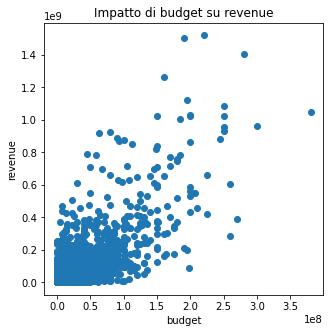

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df["budget"],df["revenue"])
ax.set_xlabel("budget")
ax.set_ylabel("revenue")
ax.set_title("Impatto di budget su revenue")

Non ci sono missing values. Però ci sono evidenti valori non significativi.

In [185]:
print(df[df["budget"]<=0.0].shape)
df[["original_title","budget"]][df["budget"]<=0.0].head()

(812, 23)


,original_title,budget
4,마린보이,0
7,Control Room,0
8,Muppet Treasure Island,0
11,Revenge of the Nerds II: Nerds in Paradise,0
17,The Invisible Woman,0


E' chiaro che il valore 0 per budget è un valore non significativo.

In [184]:
df[["original_title","budget"]][(df["budget"]<=100) & (df["budget"]>0.0)].head()

,original_title,budget
334,Saamy,1
347,The Wind in the Willows,12
512,From Prada to Nada,93
639,Pollock,6
695,Tere Naam,1


E' chiaro che anche questi sono valori sbagliati. Esempi: "From Prada to Nada" ha un budget reale di 1 milione ; "Pollock" ha un budget reale di 6 milioni .

In [183]:
df[["original_title","budget"]][(df["budget"]<=1000) & (df["budget"]>100.0)]

,original_title,budget
469,"The Karate Kid, Part II",113
1917,The Merry Widow,592
2117,American Adobo,344
2251,Bodyguard,130


Anche questi sono valori chiaramente sbagliati Es: "The Karate Kid, Part II" ha un budget reale di 13 milioni $.

In [182]:
df[["original_title","budget"]][(df["budget"]<=10000) & (df["budget"]>1000.0)]

,original_title,budget
365,Primer,7000
1803,Quiet City,2500
2610,대호,5000
2781,"Blood, Guts, Bullets and Octane",7300
2855,Following,6000


I valori cominciano ad essere già più attendibili. Il budget di "Following" è veramente 6000 $.

Scelgo di considerare come valori non significativi budget i valori <=1000.

Visualizzazione grafica dei valori non attendibili.

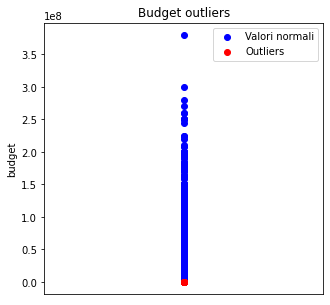

In [168]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter([2]*df[df["budget"]>1000].shape[0],df["budget"][df["budget"]>1000],c="b",label="Valori normali")
ax.scatter([2]*df[df["budget"]<=1000].shape[0],df["budget"][df["budget"]<=1000],c="r",label="Outliers")
ax.set_ylabel("budget")
ax.set_title("Budget outliers")
ax.set_xticks([])
ax.legend()

Soluzione adottata per tali valori: li sostituisco con la media.

In [248]:
(df["budget"]<1000).sum()

830

Essendo alto il numero di valori non significativi, aggiungiamo anche una variabile binaria (feature dummy) che segnali ciò.

### 2) IMDB_ID

Text(0.5, 1.0, 'Impatto di imdb_id su revenue')

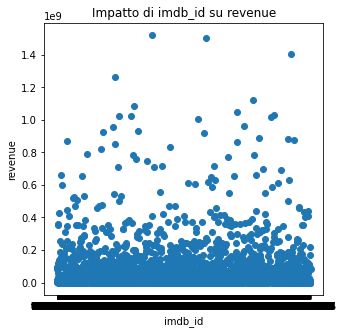

In [333]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df["imdb_id"],df["revenue"])
ax.set_xlabel("imdb_id")
ax.set_ylabel("revenue")
ax.set_title("Impatto di imdb_id su revenue")

Tale feature di fatto rappresenta solo un identificativo univoco all'interno di IMBD: dunque non ha singificato rispetto a "revenue". Non considero tale feature nel modello.

### 3) POPULARITY

Ha sicuramente impatto sul revenue. Vale sicuramente la pena provare a metterlo nel modello. 

Text(0.5, 1.0, 'Impatto di popularity su revenue')

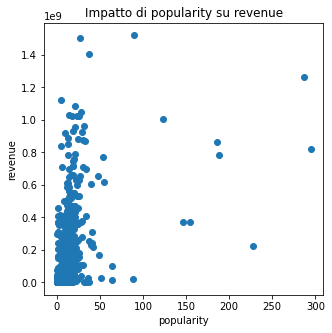

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df["popularity"],df["revenue"])
ax.set_xlabel("popularity")
ax.set_ylabel("revenue")
ax.set_title("Impatto di popularity su revenue")

Non ci sono missing values o valori poco significativi (di fatto popularity è una misura di popolarità avente come limite inferiore 0).

### 4) RUNTIME

Anche in questo caso vale la pena provare a metterlo nel modello. 

Text(0.5, 1.0, 'Impatto di runtime su revenue')

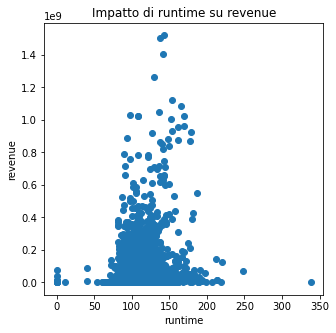

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df["runtime"],df["revenue"])
ax.set_xlabel("runtime")
ax.set_ylabel("revenue")
ax.set_title("Impatto di runtime su revenue")

Sono però presenti dei **missing values** (anche se proprio pochi).

In [171]:
df[df["runtime"].isna()].shape[0]

2

Controlliamo i  **valori poco significativi**. 

In [173]:
(df["runtime"]<=0).sum()

12

Valori sicuramente non significativi.

In [181]:
df[["original_title","runtime"]][(df["runtime"]<=20) & (df["runtime"]>0)].head()

,original_title,runtime
2577,"The Life and Death of 9413, a Hollywood Extra",11.0


Un solo film: "The Life and Death of 9413, a Hollywood Extra". E il valore è corretto: dura 11 minuti.

In [180]:
df[["original_title","runtime"]][(df["runtime"]<=40) & (df["runtime"]>10)].head()

,original_title,runtime
775,Born to Be Wild,40.0
1020,The Living Sea,40.0
2577,"The Life and Death of 9413, a Hollywood Extra",11.0


I valori sono corretti. "Born To Be Wild" è di 40 minuti.

Considero come valori non significativi per "runtime" i valori <= 0.

Soluzione adottata per tali valori: sostituisco con la media.

Essendo basso tale numero (12 film) non vale la pena mettere variabile dummy che segnali ciò. 

## FEATURES CATEGORIALI

Vediamo ora gli attributi che sono categoriali, o che comunque sono naturalmente trattati come tali.

### 1) BELONGS_TO_COLLECTION

Trasformiamo in categoriale binaria (dummy) in modo ovvio : 1 se film fa parte di una collezione, 0 altrimenti.

Se un film non fa parte di una collezione semplicemente il suo valore per "belongs_to_collection" è mancante.

Text(0.5, 1.0, 'Revenue medio rispetto alla collezione')

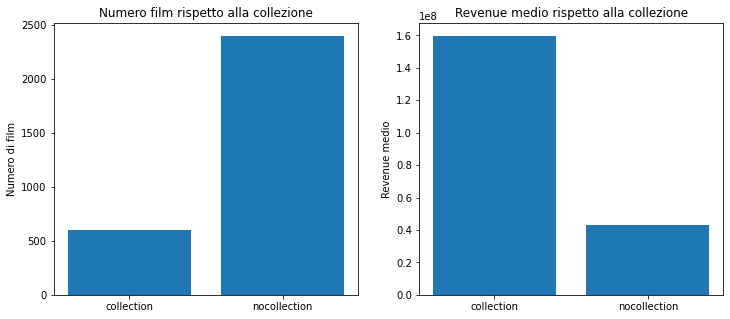

In [195]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

# Numerosità di film rispetto al far parte di una collezione/non far parte.
num_film_collection = df[~(df["belongs_to_collection"].isna())].shape[0]
num_film_no_collection = df[(df["belongs_to_collection"].isna())].shape[0]

axs[0].bar(["collection","nocollection"],[num_film_collection,num_film_no_collection])
axs[0].set_ylabel("Numero di film")
axs[0].set_title("Numero film rispetto alla collezione")

# Revenue medio dei film rispetto al far parte di una collezione/non far parte.
mean_rev_collection = df["revenue"][~(df["belongs_to_collection"].isna())].mean()
mean_rev_no_collection = df["revenue"][df["belongs_to_collection"].isna()].mean()

axs[1].bar(["collection","nocollection"],[mean_rev_collection,mean_rev_no_collection])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio rispetto alla collezione")

Ha un relativo impatto su revenue: è da provare a considerare nel modello.

### 2) HOMEPAGE 

Trasformiamo in categoriale binaria (dummy) in modo ovvio : 1 se film ha una homepage, 0 altrimenti.

Se un film non ha una homepage semplicemente il suo valore per "homepage" è mancante.

Text(0.5, 1.0, 'Revenue medio rispetto alla homepage')

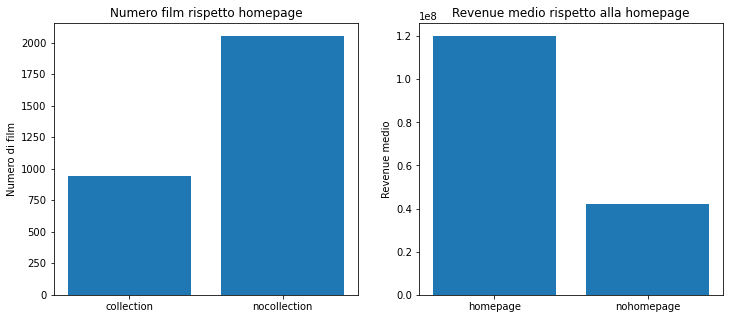

In [196]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

# Numerosità di film rispetto alla homepage
num_film_homepage = df[~(df["homepage"].isna())].shape[0]
num_film_no_homepage = df[(df["homepage"].isna())].shape[0]

axs[0].bar(["collection","nocollection"],[num_film_homepage,num_film_no_homepage])
axs[0].set_ylabel("Numero di film")
axs[0].set_title("Numero film rispetto homepage")

# Revenue medio rispetto alla homepage
mean_rev_homepage = df["revenue"][~(df["homepage"].isna())].mean()
mean_rev_no_homepage = df["revenue"][df["homepage"].isna()].mean()

axs[1].bar(["homepage","nohomepage"],[mean_rev_homepage,mean_rev_no_homepage])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio rispetto alla homepage")

Ha un relativo impatto su revenue: è da provare a considerare nel modello.

### 3) ORIGINAL_LANGUAGE

Si tratta di una variabile categoriale con k livelli.

In [3]:
languages = df["original_language"].unique()
print(languages)
print("Numero lingue: ",len(languages))

['en' 'hi' 'ko' 'sr' 'fr' 'it' 'nl' 'zh' 'es' 'cs' 'ta' 'cn' 'ru' 'tr'
 'ja' 'fa' 'sv' 'de' 'te' 'pt' 'mr' 'da' 'fi' 'el' 'ur' 'he' 'no' 'ar'
 'nb' 'ro' 'vi' 'pl' 'hu' 'ml' 'bn' 'id']
Numero lingue:  36


Text(0.5, 1.0, 'Revenue medio rispetto alla lingua')

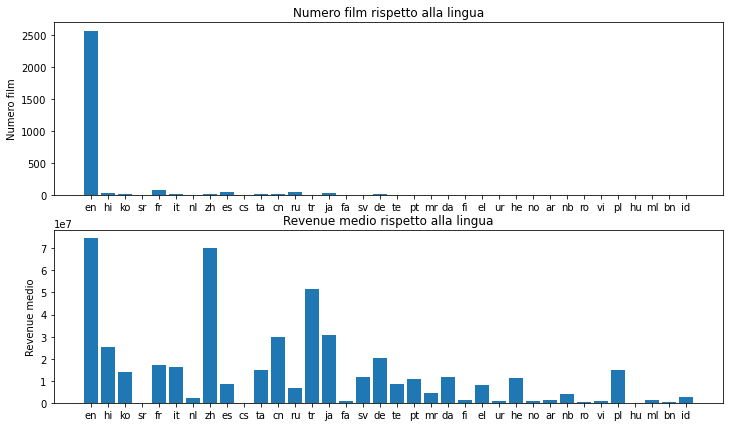

In [201]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(12,7))

# Numerosità film rispetto la lingua
num_film_per_language = [ (df[df["original_language"]==l]).shape[0] for l in languages]

axs[0].bar(languages,num_film_per_language)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film rispetto alla lingua")

# Revenue medio rispetto la lingua
mean_revenue_per_language = [ (df["revenue"][df["original_language"]==l]).mean() for l in languages]

axs[1].bar(languages,mean_revenue_per_language)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio rispetto alla lingua")

Vediamo diverse alternative per poterla lavorare e trattare.

**PRIMA ALTERNATIVA** 

Sono molti i film inglesi e pochissimi quelli non inglesi.

Text(0.5, 1.0, 'Revenue medio rispetto alla lingua inglese')

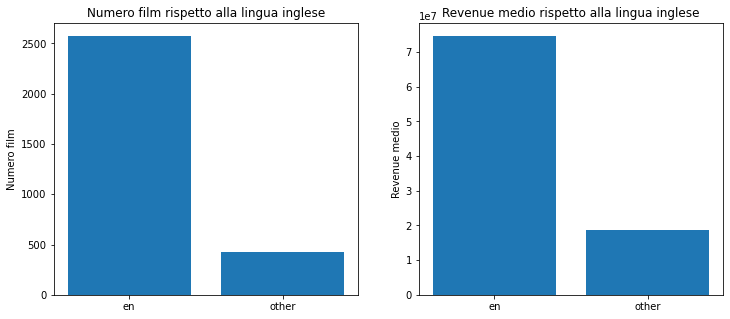

In [209]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,5))

# Numerosità film rispetto alla lingua inglese/non inglese
num_film_en = [(df[df["original_language"]=="en"]).shape[0],(df[df["original_language"]!="en"]).shape[0]]

axs[0].bar(["en","other"],num_film_en)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film rispetto alla lingua inglese")

# Revenue medio film rispetto alla lingua inglese/non inglese
mean_revenue_en = [(df["revenue"][df["original_language"]=="en"]).mean(),(df["revenue"][df["original_language"]!="en"]).mean()]

axs[1].bar(["en","other"],mean_revenue_en)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio rispetto alla lingua inglese")

Essendoci pochi film non inglesi ed essendo relativamente alto l'impatto se un film è inglese o no, semplicemente faccio una variabile binaria (dummy) che mi dice se il film è inglese o no.

**SECONDA ALTERNATIVA**

Le prime 7 lingue rispetto al revenue medio le tengo come valori categoriali distinti. Tutte le altre lingue le accorpo nella categoria "other". Ho dunque una variabile categoriale con 8 valori distinti: tale feature la trasformo in 8 variabili binarie(dummy).

In [204]:
best_languages = np.argsort(mean_revenue_per_language)[::-1]

print("Lingue che rimangono valori categoriali distinti: ",languages[best_languages[:7]]) 
print()

print("Lingue accorpate in other: ",languages[best_languages[7:]]) 

Lingue che rimangono valori categoriali distinti:  ['en' 'zh' 'tr' 'ja' 'cn' 'hi' 'de']

Lingue accorpate in other:  ['fr' 'it' 'pl' 'ta' 'ko' 'da' 'sv' 'he' 'pt' 'es' 'te' 'el' 'ru' 'mr'
 'nb' 'id' 'nl' 'fi' 'ar' 'ml' 'no' 'fa' 'ur' 'vi' 'bn' 'ro' 'hu' 'cs'
 'sr']


Guardando i grafici precedenti ci si accorge che palesemente questa seconda alternativa è peggiore. La si vuole comunque testare.

## FEATURE DATA

L'unica feature data è **release_date**. Tale feature è nella struttura di *mese-giorno-anno*.

**1) YEAR**

L'anno lo considero come una variabile numerica. Dunque creo una feature year.

In [4]:
films_year = df["release_date"].map(lambda s : int(s.split("/")[2])).values

np.unique(films_year)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 42,
       43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99], dtype=int64)

Non è rappresentato l'anno per intero, ma solo le ultime due cifre. Trasformiamo correttamente ciò.

In [5]:
def transform_year(y):
    return 1900+y if (y>=20 and y<=99) else 2000+y

films_year = np.array([transform_year(y) for y in films_year])

In [6]:
years = np.unique(films_year)

years

array([1921, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1933, 1935,
       1936, 1938, 1939, 1940, 1942, 1943, 1944, 1945, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Impatto di year su revenue')

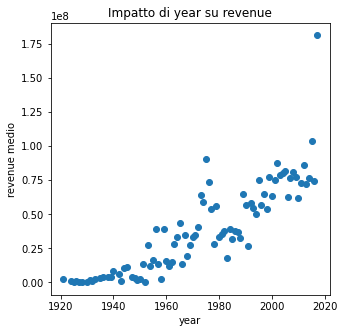

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

# Revenue medio rispetto all'anno
mean_rev_per_year = [ (df["revenue"][films_year==y]).mean() for y in years]

ax.scatter(years,mean_rev_per_year)
ax.set_xlabel("year")
ax.set_ylabel("revenue medio")
ax.set_title("Impatto di year su revenue")

Impatto significativo di year su revenue: sicuramente lo consideriamo nel modello.

**2) MONTH**

Il mese lo considero come una variabile categoriale con 12 livelli.

In [46]:
films_month = df["release_date"].map(lambda s : int(s.split("/")[0])).values
np.unique(films_month)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Trasformiamo i valori numerici in etichette.

In [47]:
def int_to_month(n):
    s = ""
    if(n==1):
        s = "gen"
    elif(n==2):
        s = "feb"
    elif(n==3):
        s = "mar"
    elif(n==4):
        s = "apr"
    elif(n==5):
        s = "may"
    elif(n==6):
        s = "jun"
    elif(n==7):
        s = "jul"
    elif(n==8):
        s = "aug"
    elif(n==9):
        s = "sep"
    elif(n==10):
        s = "oct"
    elif(n==11):
        s = "nov"
    elif(n==12):
        s = "dec"
    else:
        raise RuntimeError("Month error: ",n)
        
    return s

In [48]:
months = np.array([ int_to_month(m) for m in range(1,13)]) # Lista di mesi (etichette)
print(months)

# Vettore che contiene per ogni film l'etichetta del mese in cui tale film è stato rilasciato
films_month = np.array([ int_to_month(m) for m in films_month])
np.unique(films_month)

['gen' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'oct' 'nov' 'dec']


array(['apr', 'aug', 'dec', 'feb', 'gen', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype='<U3')

Text(0.5, 1.0, 'Revenue medio per mese')

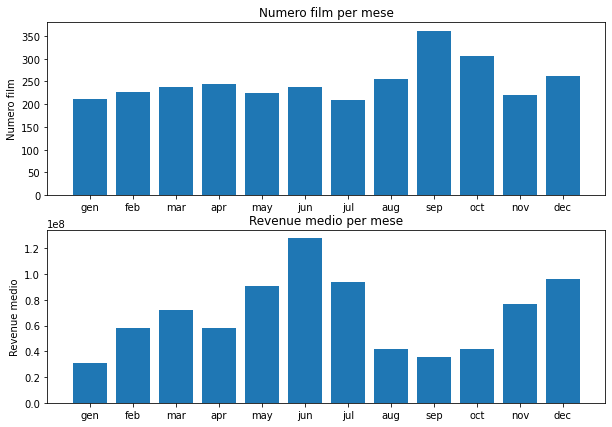

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10,7)) 

# Numerosità di film rispetto al mese
numb_per_month = [ df[films_month==m].shape[0] for m in months]

axs[0].bar(months,numb_per_month)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per mese")

# Revenue medio rispetto al mese
mean_rev_per_month = [ (df["revenue"][films_month==m]).mean() for m in months]

axs[1].bar(months,mean_rev_per_month)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per mese")

Il mese può essere informativo rispetto al revenue. 
I film sono distribuiti in modo piuttosto equo tra i mesi.


**ALTERNATIVA 1**

Semplicemente considero *month* come una feature categoriale a 12 livelli : trasformo ciò in 12 variabili dummy.

**ALTERNATIVA 2**

Tengo come valori distinti solo i primi 5 mesi rispetto alla numerosità di film: tutti gli altri film li accorpo nel livello "other".

In [50]:
months_sorted = np.argsort(numb_per_month)[::-1] # Mesi ordinati per numerosità

months_1 = [ months[m] for m in months_sorted[:5] ] # Mesi selezionati
months_1.append("other_month")

months_in_other = [ months[m] for m in months_sorted[5:] ] # Mesi accorpati in "other"

print("Mesi rimasti: ",months_1)
print("Mesi accorpati in other: ",months_in_other)

Mesi rimasti:  ['sep', 'oct', 'dec', 'aug', 'apr', 'other_month']
Mesi accorpati in other:  ['mar', 'jun', 'feb', 'may', 'nov', 'gen', 'jul']


Text(0.5, 1.0, 'Revenue medio per mese ~ primi 5 mesi per numero film')

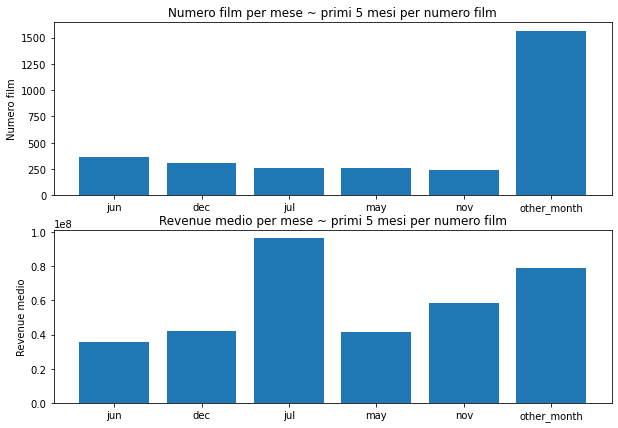

In [52]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10,7)) 

# Vettore che contiene per ogni film il mese in cui è stato rilasciato se tale mese è nei primi 5 mesi, altrimenti contiene 
# "other_month"
films_month_other = np.array([("other_month" if m in months_in_other else m) for m in films_month])

# Numerosità di film rispetto al mese
numFilm_per_month_other = [(df[films_month_other==m]).shape[0] for m in months_1]
axs[0].bar(months_2,numFilm_per_month_other)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per mese ~ primi 5 mesi per numero film")

# Revenue medio rispetto al mese
mean_rev_per_month_other = [ (df["revenue"][films_month_other==m]).mean() for m in months_1]
axs[1].bar(months_2,mean_rev_per_month_other)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per mese ~ primi 5 mesi per numero film")

**Alternativa 3**

Considero come valori possibili solo i primi 5 mesi con media revenue maggiore. Tutti gli altri mesi li accorpo nel valore "other".

In [53]:
best_months = np.argsort(mean_rev_per_month)[::-1] # Mesi ordinati rispetto revenue medio

months_2 = [ months[m] for m in best_months[:5] ] # Mesi selezionati
months_2.append("other_month")

months_in_other = [ months[m] for m in best_months[5:] ] # Mesi accorpati in "other"

print("Mesi rimasti: ",months_2)
print("Mesi accorpati in other: ",months_in_other)

Mesi rimasti:  ['jun', 'dec', 'jul', 'may', 'nov', 'other_month']
Mesi accorpati in other:  ['mar', 'apr', 'feb', 'oct', 'aug', 'sep', 'gen']


Text(0.5, 1.0, 'Revenue medio per mese ~ primi 5 mesi per revenue medio')

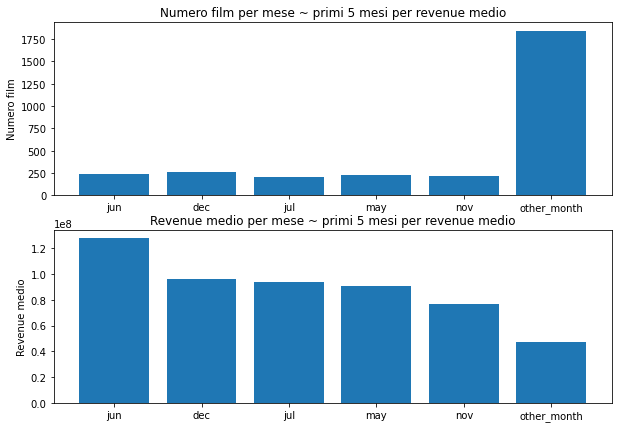

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(10,7)) 

# Vettore che contiene per ogni film il mese in cui è stato rilasciato se questo è tra i primi 5 mesi, altrimenti contiene
# "other_month"
films_month_other = np.array([("other_month" if m in months_in_other else m) for m in films_month])

# Numerosità film rispetto al mese
numFilm_per_month_other = [(df[films_month_other==m]).shape[0] for m in months_2]
axs[0].bar(months_2,numFilm_per_month_other)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per mese ~ primi 5 mesi per revenue medio")

# Revenue medio rispetto al mese
mean_rev_per_month_other = [ (df["revenue"][films_month_other==m]).mean() for m in months_2]
axs[1].bar(months_2,mean_rev_per_month_other)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per mese ~ primi 5 mesi per revenue medio")

Come si nota in "jun" "dec" "jul" "may" e "nov" ci sono pochi film, mentre ce ne sono tanti in "other_month".

**ALTERNATIVA 4**

Creiamo una sola feature categoriale binaria (dummy) : 1 se il mese del film è nei primi 6 mesi con revenue maggiore ; 0 se è nei 6 con revenue peggiore.

Text(0.5, 1.0, 'Revenue medio per livello del mese')

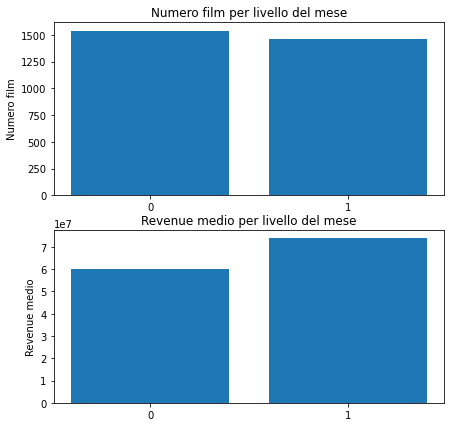

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(7,7)) 

first_six_months = [int_to_month(m) for m in best_months[:6]] # Primi 6 mesi rispetto revenue medio

# Vettore che per ogni film contiene 1 se il mese del film è tra i primi 6 mesi, 0 altrimenti
films_month_dummy = np.array([(1 if m in first_six_months else 0) for m in films_month])

# Numerosità film rispetto al mese
num_film_per_month_dummy = [ (df[films_month_dummy==0]).shape[0] , (df[films_month_dummy==1]).shape[0]]
axs[0].bar(["0","1"],num_film_per_month_dummy)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per livello del mese")

# Revenue medio rispetto al mese
mean_rev_per_month_dummy = [ (df["revenue"][films_month_dummy==0]).mean() , (df["revenue"][films_month_dummy==1]).mean()]
axs[1].bar(["0","1"],mean_rev_per_month_dummy)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per livello del mese")

Soluzione non sembra ottimale perchè non c'è così differenza tra i due valori.

**Alternativa 5**

Riguardiamo il plot delle revenue medie per mese.

<BarContainer object of 12 artists>

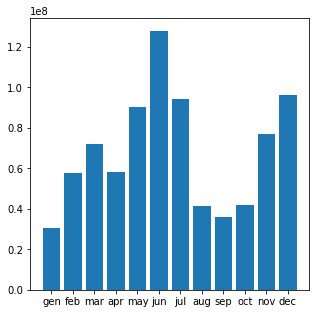

In [235]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.bar(months,mean_rev_per_month)

Possiamo dividere i mesi in 3 gruppi : jun ; dec, jul, may, nov, mar ; feb, apr, oct, aug, gen. Ovvero: il primo mese più rilevante ; gli altri 5 mesi più rilevanti ; i restanti 6 mesi più rilevanti.

Feature categoriale con 3 valori : 1, 2 e 3.

In [38]:
months_in_1 = [months[best_months[0]]] # Mesi nel primo livello
months_in_2 = months[best_months[1:6]] # Mesi nel secondo livello
months_in_3 = months[best_months[6:]] # Mesi nel terzo livello
print("Livello 1: ",months_in_1)
print("Livello 2: ",months_in_2)
print("Livello 3: ",months_in_3)

Livello 1:  ['jun']
Livello 2:  ['dec' 'jul' 'may' 'nov' 'mar']
Livello 3:  ['apr' 'feb' 'oct' 'aug' 'sep' 'gen']


In [39]:
# Funzione che dato un mese ritorna il valore del livello corrispondente
def transform(m):
    if m in months_in_1:
        return 1
    elif m in months_in_2:
        return 2
    elif m in months_in_3:
        return 3
    else:
        raise RuntimeError("Month error: ",m)
  
# Vettore che contiene per ogni film il valore del livello corrispondente al suo mese
films_month_categ = np.array([transform(m) for m in films_month]) 
np.unique(films_month_categ)

array([1, 2, 3])

Text(0.5, 1.0, 'Revenue medio per livello del mese')

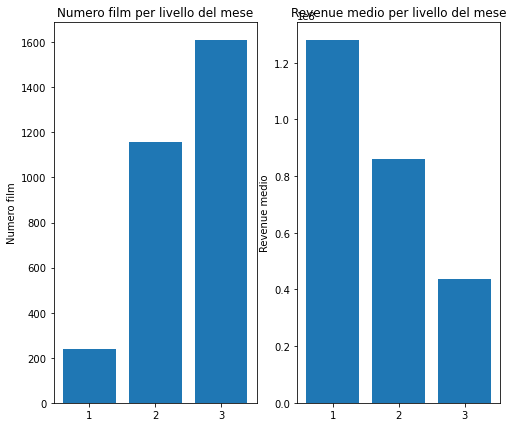

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(8,7)) 

# Numerosità film rispetto al mese
num_film_per_month_categ = [ (df[films_month_categ==1]).shape[0] , (df[films_month_categ==2]).shape[0] , (df[films_month_categ==3]).shape[0]]
axs[0].bar([1,2,3],num_film_per_month_categ)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per livello del mese")

# Revenue medio rispetto al mese
mean_rev_per_month_categ = [ (df["revenue"][films_month_categ==1]).mean() , (df["revenue"][films_month_categ==2]).mean() , (df["revenue"][films_month_categ==3]).mean()]
axs[1].bar([1,2,3],mean_rev_per_month_categ)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per livello del mese")

Soluzione potrebbe essere non ottimale perchè i livelli sono molto sbilanciati in termini di numero di film.

**ALTERNATIVA 6**

Vogliamo livelli significativi rispetto al revenue medio, ma che siano anche bilanciati in termini di numero di film.

Dividiamo i mesi in 3 gruppi : primi 4 mesi migliori rispetto a revenue; successivi 4 mesi migliori ; ultimi 4 mesi. Dunque sempre 3 livelli, ma questa volta più bilanciati.

In [41]:
months_in_1 = months[best_months[0:4]] # Mesi livello 1
months_in_2 = months[best_months[4:8]] # Mesi livello 2
months_in_3 = months[best_months[8:12]] # Mesi livello 3
print("Livello 1: ",months_in_1)
print("Livello 2: ",months_in_2)
print("Livello 3: ",months_in_3)

Livello 1:  ['jun' 'dec' 'jul' 'may']
Livello 2:  ['nov' 'mar' 'apr' 'feb']
Livello 3:  ['oct' 'aug' 'sep' 'gen']


In [42]:
# Funzione che dato un mese ritorna il livello corrispondente
def transform(m):
    if m in months_in_1:
        return 1
    elif m in months_in_2:
        return 2
    else:
        return 3

# Vettore che per ogni film contiene il livello del mese corrispondente
films_month_categ = np.array([transform(m) for m in films_month])
np.unique(films_month_categ)

array([1, 2, 3])

Text(0.5, 1.0, 'Revenue medio per livello del mese')

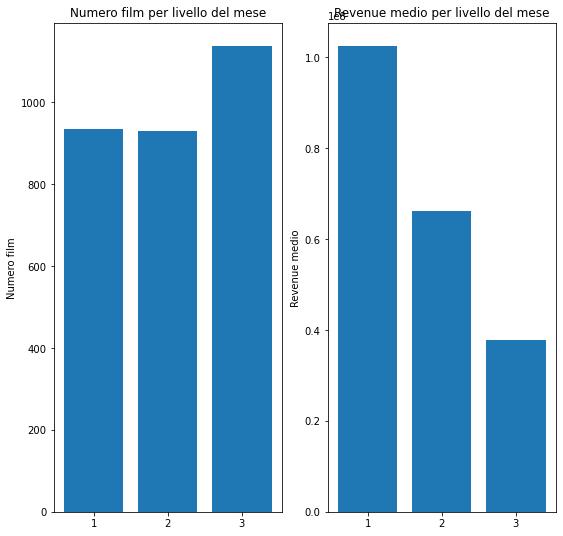

In [43]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(9,9)) 

# Numerosità film rispetto al mese
num_film_per_month_categ = [ (df[films_month_categ==1]).shape[0] , (df[films_month_categ==2]).shape[0] , (df[films_month_categ==3]).shape[0]]
axs[0].bar(["1","2","3"],num_film_per_month_categ)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per livello del mese")

# Revenue medio rispetto al mese
mean_rev_per_month_categ = [ (df["revenue"][films_month_categ==1]).mean() , (df["revenue"][films_month_categ==2]).mean() , (df["revenue"][films_month_categ==3]).mean()]
axs[1].bar(["1","2","3"],mean_rev_per_month_categ)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per livello del mese")

Come si vede, i livelli ora sono più equilibrati in termini di numero di film. E sono anche più discriminanti rispetto al revenue.

**3)DAY**

Non considero il giorno.

### 4) POSTER_PATH

Anche qui l'interpretazione più semplice per tale feature è quella di considerarla come variabile dummy: 1 se il film ha un poster path, 0 altimenti.

In [334]:
(df["poster_path"].isna()).sum()

1

C'è solo un film senza "poster_path" : non ha dunque senso considerare la variabile binaria che segnali ciò.

### 5) STATUS

E' una variabile categoriale con solo due livelli.

In [335]:
df["status"].unique()

array(['Released', 'Rumored'], dtype=object)

In [336]:
(df["status"]=="Released").sum()

2996

Ci sono dunque solo 4 film con "status" che è "Rumored" : non ha dunque senso considerare tale feature.

## FEATURES INSIEMISTICHE

### 1) GENRES

Primaditutto è bene fare attenzione : ci sono missing values (anche se molto pochi).

In [56]:
(df["genres"].isna()).sum()

7

La feature "genres" è memorizzata come stringa (tipo object), ma di fatto è una lista di dizionari. Trasformiamo ogni valore di "genres" in un effettivo insieme di generi.

In [57]:
df["genres"][1]

"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]"

In [58]:
df["genres"] = df["genres"].fillna("{}") # Ci sono missing values : li rimpiazziamo semplicemente con un insieme vuoto.

# Ogni elemento lo rendiamo lista di dizionari
df["genres"]=df["genres"].map(lambda obj : eval(obj)) # eval prende la stringa codificante un dizionario e ritorna la lista di 
                                                      # dizionari corrispondente
    
# Ogni lista di dizionari lo rendiamo un set di generi.
df["genres"] = df["genres"].map(lambda lst : {dct['name'] for dct in lst})

In [59]:
df["genres"][1]

{'Comedy', 'Drama', 'Family', 'Romance'}

Prendiamo tutti i generi.

In [60]:
generi = set([])
for film in range(0, df.shape[0]):
        generi |= df.loc[film,"genres"]
generi = list(generi)
generi

['Animation',
 'Adventure',
 'Family',
 'Music',
 'Comedy',
 'Thriller',
 'Science Fiction',
 'TV Movie',
 'Mystery',
 'Fantasy',
 'Crime',
 'Documentary',
 'Foreign',
 'Horror',
 'Drama',
 'Action',
 'Western',
 'Romance',
 'War',
 'History']

Text(0.5, 1.0, 'Revenue medio per genere')

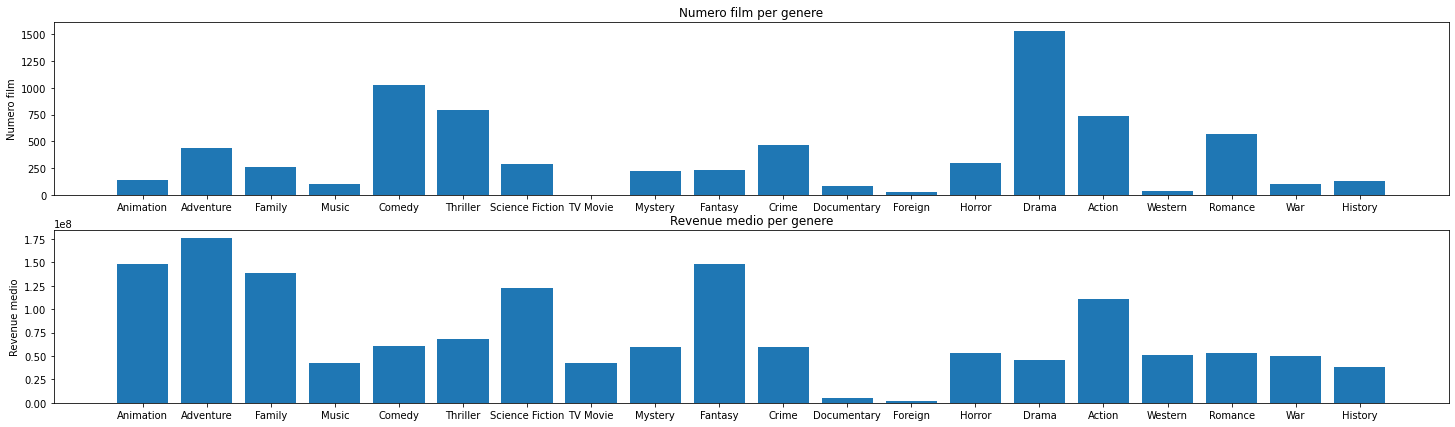

In [61]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(25,7)) 

# Numerosità film rispetto al genere
numFilm_per_genre = [ (df[[ gen in s for s in df["genres"] ]]).shape[0] for gen in generi]
axs[0].bar(generi,numFilm_per_genre)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per genere")

# Revenue medio rispetto al genere
mean_rev_per_genre = [ (df["revenue"][ [ gen in s for s in df["genres"] ] ]).mean() for gen in generi]
axs[1].bar(generi,mean_rev_per_genre)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per genere")

**ALTERNATIVA 1**

Tengo i primi *k* generi più numerosi: da questi k generi creo k variabili dummy, che segnalano se un film ha o meno quel genere. Tutti gli altri generi li metto in "other_genre", che è un altro livello ed è sempre trasformato in feature dummy. Dunque in totale $k+1$ features.

Consideriamo ora come esempio $k=9$.

In [62]:
genres_sorted = np.argsort(numFilm_per_genre)[::-1] # generi ordinati per numerosità

generi_1 = [ generi[gen] for gen in genres_sorted[:9] ] # generi selezionati
generi_1.append("other_genre")

generi_in_other = set([ generi[gen] for gen in genres_sorted[9:] ]) # generi accorpati in other

print("Generi selezionati: ",generi_1)
print()
print("Generi accorpati in other: ",generi_in_other)

Generi selezionati:  ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Crime', 'Adventure', 'Horror', 'Science Fiction', 'other_genre']

Generi accorpati in other:  {'Documentary', 'Animation', 'Foreign', 'Family', 'Music', 'Mystery', 'Western', 'TV Movie', 'Fantasy', 'War', 'History'}


Text(0.5, 1.0, 'Revenue medio per genere ~ primi 9 generi per numero film')

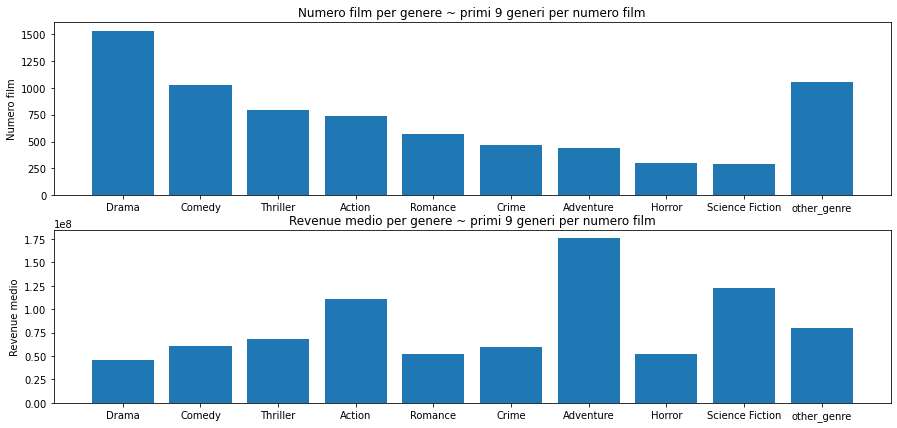

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(15,7)) 

# Numerosità film rispetto al genere
numFilm_per_genre_1 = [ (df[[ (gen in s) if gen!="other_genre" else (generi_in_other&s!=set([])) for s in df["genres"] ]]).shape[0] for gen in generi_1]
axs[0].bar(generi_1,numFilm_per_genre_1)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per genere ~ primi 9 generi per numero film")

# Revenue medio rispetto al genere
mean_rev_per_genre_1 = [ (df["revenue"][ [ (gen in s) if gen!="other_genre" else (generi_in_other&s!=set([])) for s in df["genres"] ] ]).mean() for gen in generi_1]
axs[1].bar(generi_1,mean_rev_per_genre_1)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per genere ~ primi 9 generi per numero film")

**ALTERNATIVA 2**

Sia $n$ il numero totale di generi. Creo $n/k$ livelli, con n mod k = 0. Nel primo metto i primi $k$ generi rispetto al revenue medio ; nel secondo livello metto i successivi $k$ generi ; ... ; nel (n/k)-esimo livello metto gli ultimi $k$ generi. Ho dunque $n/k$ livelli --> $n/k$ nuove features dummy.

Consideriamo, per esempio, $k=5$ (ricordo che $n=20$). Ho 4 livelli.

In [33]:
best_genres = np.argsort(mean_rev_per_genre)[::-1] # generi ordinati rispetto revenue medio

# 4 livelli, ognuno con 5 film
generi_in_1 = set([ generi[gen] for gen in best_genres[:5]])
generi_in_2 = set([ generi[gen] for gen in best_genres[5:10]])
generi_in_3 = set([ generi[gen] for gen in best_genres[10:15]])
generi_in_4 = set([ generi[gen] for gen in best_genres[15:20]])

generi_cat = [generi_in_1,generi_in_2,generi_in_3,generi_in_4] # lista dei 4 livelli di generi

generi_cat

[{'Adventure', 'Animation', 'Family', 'Fantasy', 'Science Fiction'},
 {'Action', 'Comedy', 'Crime', 'Mystery', 'Thriller'},
 {'Drama', 'Horror', 'Romance', 'War', 'Western'},
 {'Documentary', 'Foreign', 'History', 'Music', 'TV Movie'}]

Text(0.5, 1.0, 'Revenue medio per genere')

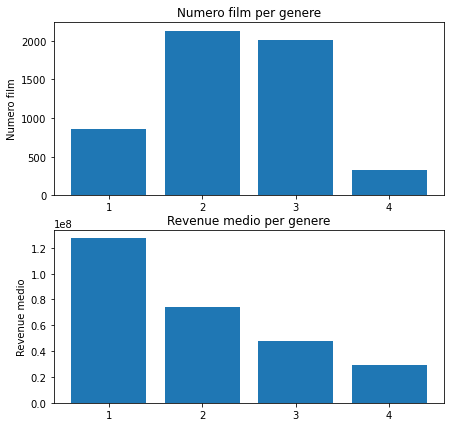

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(7,7)) 

# Numerosità film rispetto al genere
numFilm_per_genre_2 = [ (df[ [ (gen&s!=set([])) for s in df["genres"] ] ]).shape[0] for gen in generi_cat]
axs[0].bar(["1","2","3","4"],numFilm_per_genre_2)
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per genere")

# Revenue medio rispetto al genere
mean_rev_per_genre_2 = [ (df["revenue"][ [ (gen&s!=set([])) for s in df["genres"] ] ]).mean() for gen in generi_cat]
axs[1].bar(["1","2","3","4"],mean_rev_per_genre_2)
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per genere")

### 2) PRODUCTION_COMPANIES

Effettuiamo innanzitutto pulizia, come visto prima per "genres". Anche qua ci sono (pochi) missing values.

In [349]:
(df["production_companies"].isna()).sum()

156

In [350]:
df["production_companies"][0]

"[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]"

In [37]:
# Togliamo i valori nulli
df["production_companies"] = df["production_companies"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["production_companies"]=df["production_companies"].map(lambda obj : eval(obj)) # eval serve per trasformare stringa 
                                                                                        # in lista di dizionari
# Ogni lista di dizionari lo rendiamo un insieme di case di produzione.
df["production_companies"] = df["production_companies"].map(lambda lst : {dct['name'] for dct in lst})

In [38]:
df["production_companies"][0]

{'Metro-Goldwyn-Mayer (MGM)', 'Paramount Pictures', 'United Artists'}

In [39]:
companies = set([])
for film in list(df.index.values):
    companies |= df.loc[film,"production_companies"]
companies = np.array(list(companies))

print(len(companies))
companies[:6]

3695


array(['Prana Animation Studios', 'World Wrestling Entertainment (WWE)',
       'New Line Cinema', 'Bon Voyage Film Studio',
       'Imax Film Entertainment', 'Saban Brands'], dtype='<U86')

Text(0.5, 1.0, 'Revenue medio per casa produttrice - prime 10')

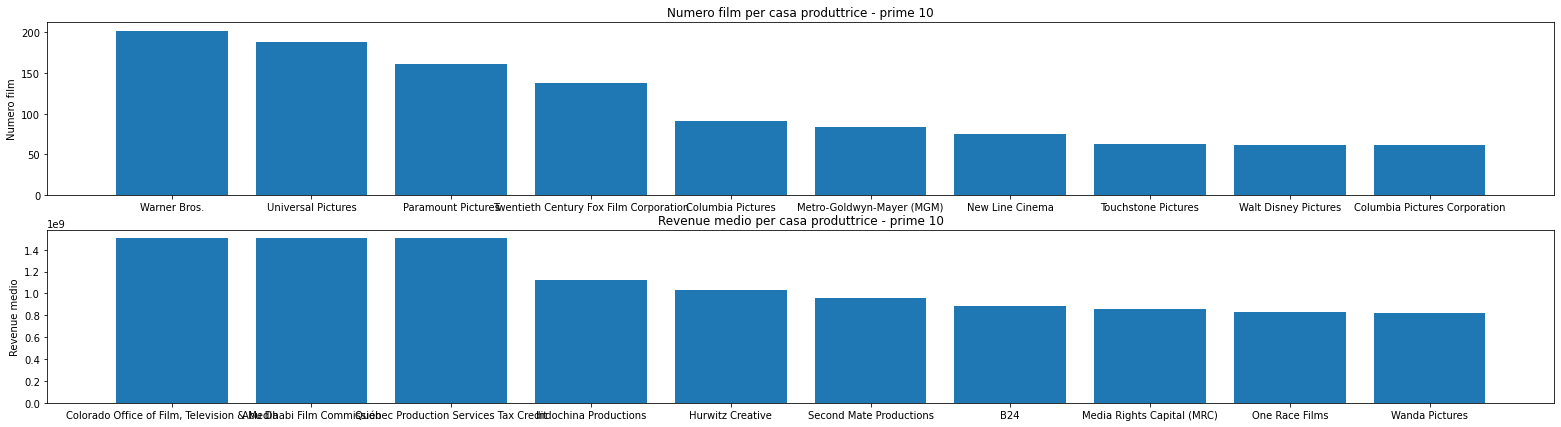

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(27,7)) 

# Numerosità film rispetto alla casa di produzione
numFilm_per_company = np.array([ (df[[ c in s for s in df["production_companies"] ]]).shape[0] for c in companies])
best_companies_num = np.argsort(numFilm_per_company)[::-1]
axs[0].bar(companies[best_companies_num[:10]],numFilm_per_company[best_companies_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per casa produttrice - prime 10")

# Revenue medio rispetto alla casa di produzione
mean_rev_per_company = np.array([ (df["revenue"][ [ c in s for s in df["production_companies"] ] ]).mean() for c in companies])
best_companies_rev = np.argsort(mean_rev_per_company)[::-1]
axs[1].bar(companies[best_companies_rev[:10]],mean_rev_per_company[best_companies_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per casa produttrice - prime 10")

**ALTERNATIVA 1**

Tengo le prime *k* case produttrici più numerose: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella casa produttrice. 

Consideriamo ora come esempio $k=7$.

Text(0.5, 1.0, 'Prime 7 case produttrici rispetto al numero film')

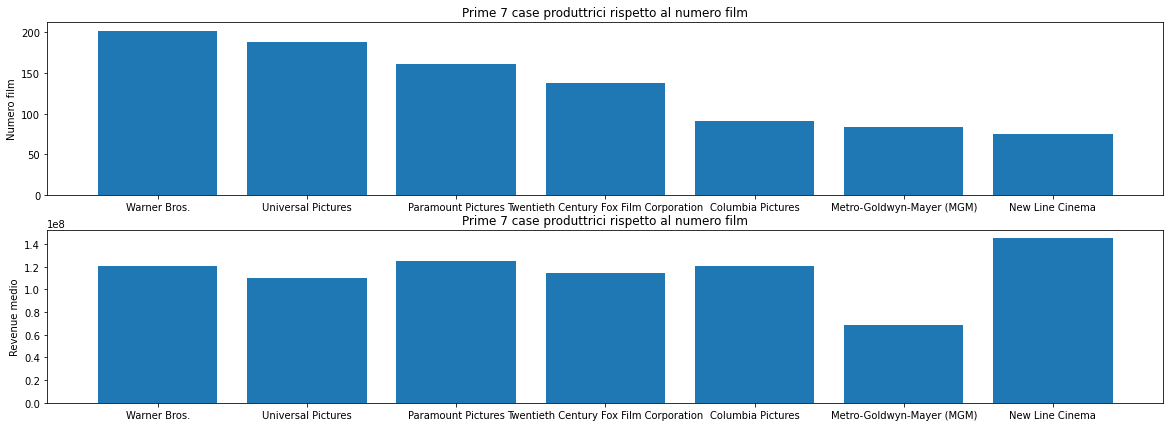

In [286]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(companies[best_companies_num[:7]],numFilm_per_company[best_companies_num[:7]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 7 case produttrici rispetto al numero film")

axs[1].bar(companies[best_companies_num[:7]],mean_rev_per_company[best_companies_num[:7]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 7 case produttrici rispetto al numero film")

Ovviamente ci sono più k possibili.

**ALTERNATIVA 2**

Stessa cosa, solo che ordino le case produttrici rispetto al revenue medio.
Tengo le prime *k* case produttrici rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella casa produttrice. 

Consideriamo ora come esempio $k=7$.

Text(0.5, 1.0, 'Prime 7 case produttrici rispetto al revenue medio')

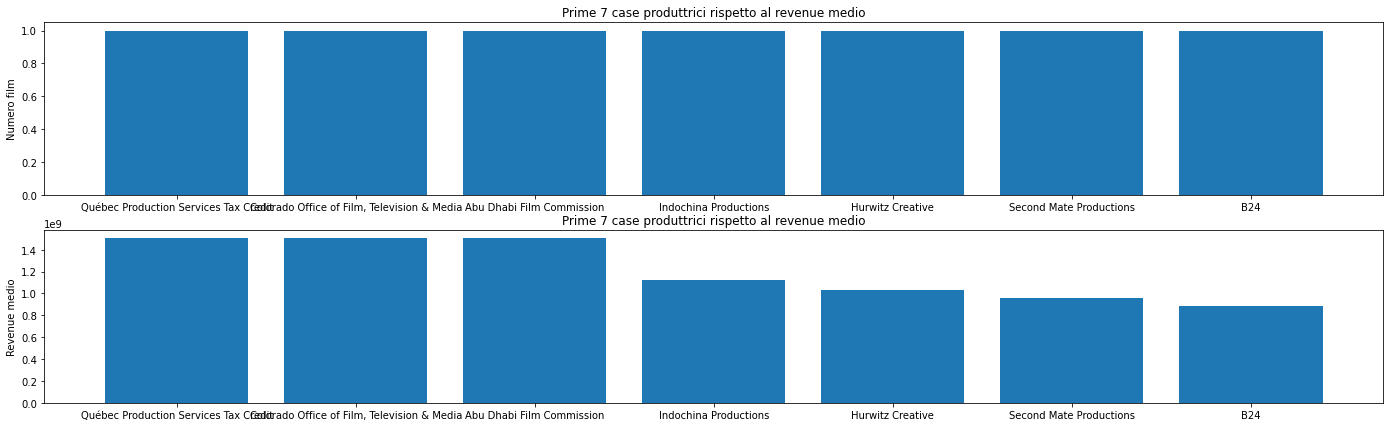

In [285]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(companies[best_companies_rev[:7]],numFilm_per_company[best_companies_rev[:7]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 7 case produttrici rispetto al revenue medio")

axs[1].bar(companies[best_companies_rev[:7]],mean_rev_per_company[best_companies_rev[:7]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 7 case produttrici rispetto al revenue medio")

C'è qualcosa di strano. Tutti questi paesi produttori hanno fatto un film solo. I paesi produttori con revenue medio maggiore sono quelli che hanno fatto pochissimi film con guadagno alto. Dunque tale analisi non è significativa. Non vale la pena prendere in considerazione questa alternativa 2.

### 3) PRODUCTION_COUNTRIES 

Effettuiamo innanzitutto pulizia, come visto prima per "genres". Anche qua ci sono (pochi) missing values.

In [2]:
(df["production_countries"].isna()).sum()

55

In [3]:
df["production_countries"][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [35]:
# Togliamo i valori nulli
df["production_countries"] = df["production_countries"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["production_countries"]=df["production_countries"].map(lambda obj : eval(obj)) # eval : da stringa a lista di dizionari
# Ogni lista di dizionari lo rendiamo un insieme di case di produzione.
df["production_countries"] = df["production_countries"].map(lambda lst : {dct['name'] for dct in lst})

In [5]:
df["production_countries"][0]

{'United States of America'}

In [6]:
countries = set([])
for film in list(df.index.values):
    countries |= df.loc[film,"production_countries"]
countries = np.array(list(countries))

print(len(countries))
countries[:6]

74


array(['Indonesia', 'Ethiopia', 'Italy', 'Morocco', 'Taiwan',
       'Bosnia and Herzegovina'], dtype='<U24')

Text(0.5, 1.0, 'Revenue medio per paese produttore - prime 10')

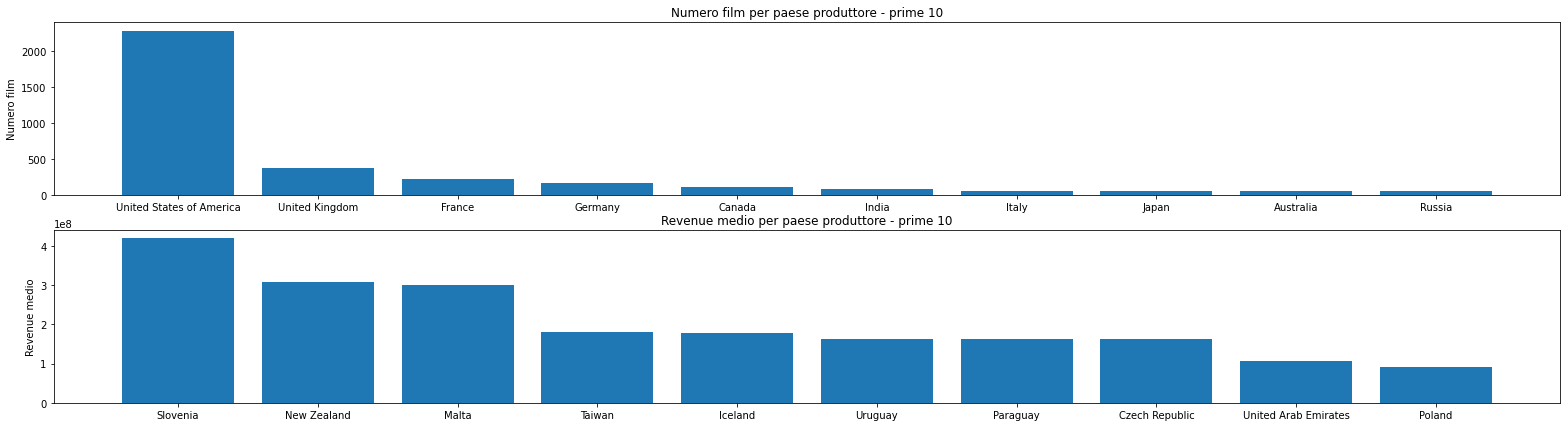

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(27,7)) 

numFilm_per_country = np.array([ (df[[ c in s for s in df["production_countries"] ]]).shape[0] for c in countries])
best_countries_num = np.argsort(numFilm_per_country)[::-1]
axs[0].bar(countries[best_countries_num[:10]],numFilm_per_country[best_countries_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per paese produttore - prime 10")

mean_rev_per_country = np.array([ (df["revenue"][ [ c in s for s in df["production_countries"] ] ]).mean() for c in countries])
best_countries_rev = np.argsort(mean_rev_per_country)[::-1]
axs[1].bar(countries[best_countries_rev[:10]],mean_rev_per_country[best_countries_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per paese produttore - prime 10")

La quasi totalità di film è fatta negli U.S.A. Si potrebbe pensare di fare semplicemente una feature dummy che dice se il film è fatto in U.S.A. oppure no. Però, come ora mostro, tale informazzione sarebbe altamente ridondante con la feature dummy che dice se il film è in lingua inglese.

In [55]:
print("Numero film americani: ",(df["production_countries"].map(lambda s : 'United States of America' in s)).sum())
print("Numero film in lingua inglese: ",(df["original_language"]=='en').sum())
print("Numero film americani e in lingua inglese: ",np.sum(np.logical_and(
    df["production_countries"].map(lambda s : 'United States of America' in s).values,(df["original_language"]=='en').values)))

Numero film americani:  2282
Numero film in lingua inglese:  2575
Numero film americani e in lingua inglese:  2260


Dunque non seguiamo questo approcio della feature dummy U.S.A./non U.S.A. Scelgo di non considerare questa feature "production_companies". (Ci sono già molte altre features rilevanti da tenere in considerazione e valutare).

### 2) SPOKEN_LANGUAGES 

Effettuiamo innanzitutto pulizia, come visto prima per "genres". Anche qua ci sono (pochi) missing values.

In [2]:
(df["spoken_languages"].isna()).sum()

20

In [3]:
df["spoken_languages"][0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [40]:
# Togliamo i valori nulli
df["spoken_languages"] = df["spoken_languages"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["spoken_languages"]=df["spoken_languages"].map(lambda obj : eval(obj))
# Ogni lista di dizionari lo rendiamo un insieme di case di produzione.
df["spoken_languages"] = df["spoken_languages"].map(lambda lst : {dct['iso_639_1'] for dct in lst})

In [41]:
df["spoken_languages"][0]

{'en'}

In [14]:
languages = set([])
for film in list(df.index.values):
    languages |= df.loc[film,"spoken_languages"]
languages = np.array(list(languages))

print(len(languages))
languages[:6]

79


array(['it', 'gu', 'id', 'hu', 'si', 'qu'], dtype='<U2')

Text(0.5, 1.0, 'Revenue medio per lingua - prime 10')

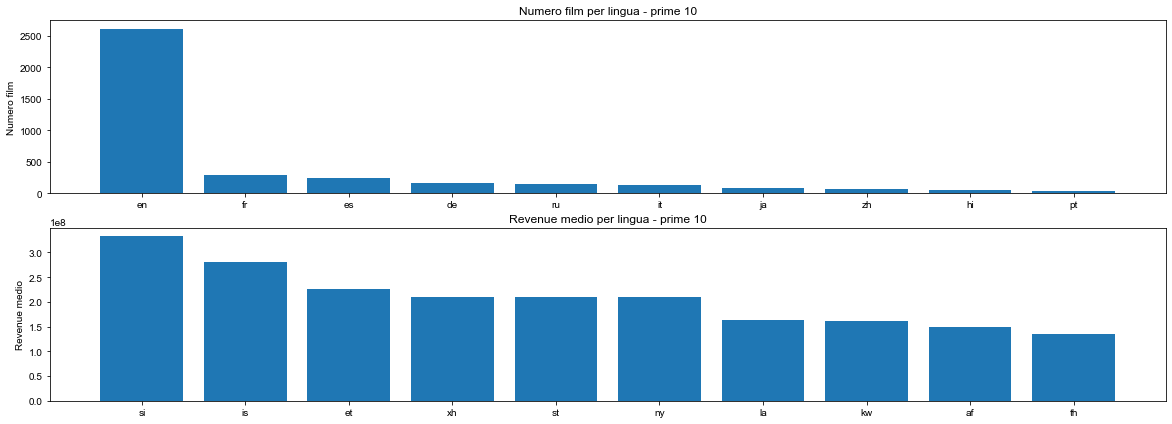

In [17]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font', family='Arial')

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_language = np.array([ (df[[ c in s for s in df["spoken_languages"] ]]).shape[0] for c in languages])
best_languages_num = np.argsort(numFilm_per_language)[::-1]
axs[0].bar(languages[best_languages_num[:10]],numFilm_per_language[best_languages_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per lingua - prime 10")

mean_rev_per_language = np.array([ (df["revenue"][ [ c in s for s in df["spoken_languages"] ] ]).mean() for c in languages])
best_languages_rev = np.argsort(mean_rev_per_language)[::-1]
axs[1].bar(languages[best_languages_rev[:10]],mean_rev_per_language[best_languages_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per lingua - prime 10")

La quasi totalità di film è in lingua inglese. 

In [21]:
(df["spoken_languages"].map(lambda s : "en" in s)).sum()

2618

La feature più informativa dunque sarebbe quella che dice semplicemente se un film è in lingua inglese o no : tale feature l'abbiamo già considerata e studiata. Dunque non prendiamo in considerazione "spoken_languages".

### 3) KEYWORDS

Effettuiamo innanzitutto pulizia, come visto prima per "genres". Anche qua ci sono (pochi) missing values.

In [4]:
(df["Keywords"].isna()).sum()

276

In [5]:
df["Keywords"][0]

"[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]"

In [42]:
# Togliamo i valori nulli
df["Keywords"] = df["Keywords"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["Keywords"]=df["Keywords"].map(lambda obj : eval(obj))
# Ogni lista di dizionari lo rendiamo un insieme di parole chiave.
df["Keywords"] = df["Keywords"].map(lambda lst : {dct['name'] for dct in lst})

In [43]:
df["Keywords"][0]

{'duringcreditsstinger', 'hot tub', 'sequel', 'time travel'}

In [54]:
keywords = set([])
for film in list(df.index.values):
    keywords |= df.loc[film,"Keywords"]
keywords = np.array(list(keywords))

print(len(keywords))
keywords[:6]

7400


array(['extreme violence', 'ambition', 'radio host', 'provence',
       'armed robbery', 'biker film'], dtype='<U47')

Text(0.5, 1.0, 'Revenue medio per parola chiave - prime 10')

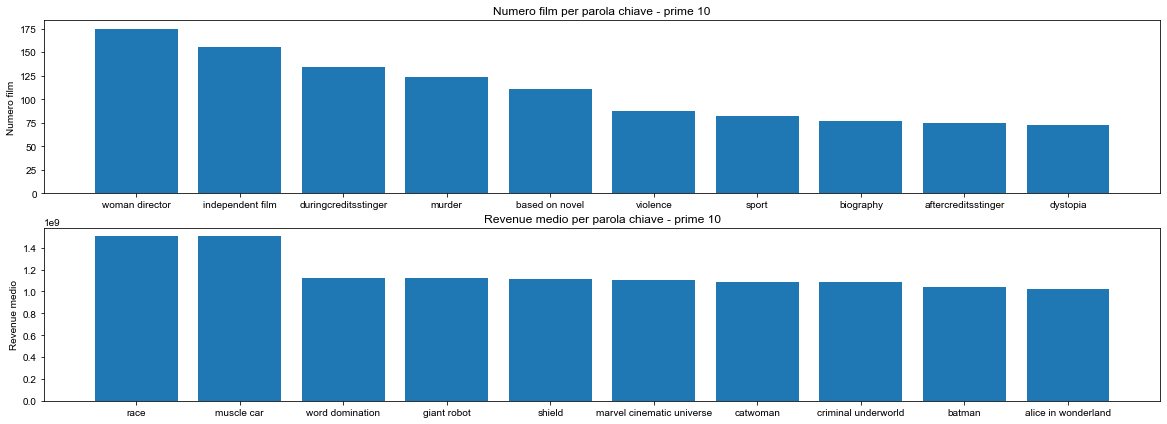

In [55]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_keyword = np.array([ (df[[ c in s for s in df["Keywords"] ]]).shape[0] for c in keywords])
best_keywords_num = np.argsort(numFilm_per_keyword)[::-1]
axs[0].bar(keywords[best_keywords_num[:10]],numFilm_per_keyword[best_keywords_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per parola chiave - prime 10")

mean_rev_per_keyword = np.array([ (df["revenue"][ [ c in s for s in df["Keywords"] ] ]).mean() for c in keywords])
best_keywords_rev = np.argsort(mean_rev_per_keyword)[::-1]
axs[1].bar(keywords[best_keywords_rev[:10]],mean_rev_per_keyword[best_keywords_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per parola chiave - prime 10")

**ALTERNATIVA 1**

Tengo le prime *k* parole chiave più numerose: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola chiave. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 parole chiave rispetto al numero film')

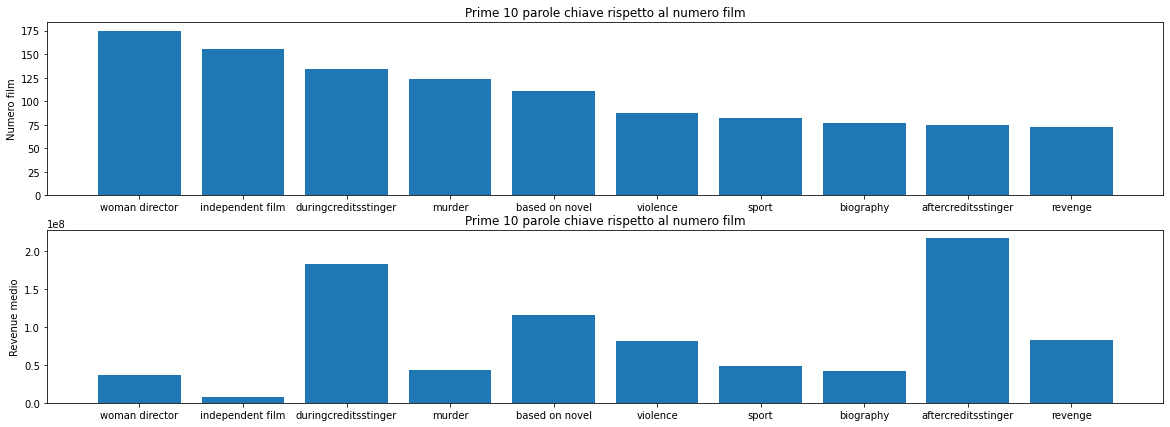

In [287]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(keywords[best_keywords_num[:10]],numFilm_per_keyword[best_keywords_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole chiave rispetto al numero film")

axs[1].bar(keywords[best_keywords_num[:10]],mean_rev_per_keyword[best_keywords_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole chiave rispetto al numero film")

Ovviamente ci sono più k possibili.

**ALTERNATIVA 2**

Stessa cosa, solo che ordino le parole chiave rispetto al revenue medio.
Tengo le prime *k* parole chiave rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola chiave. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 parole chiave rispetto al revenue medio')

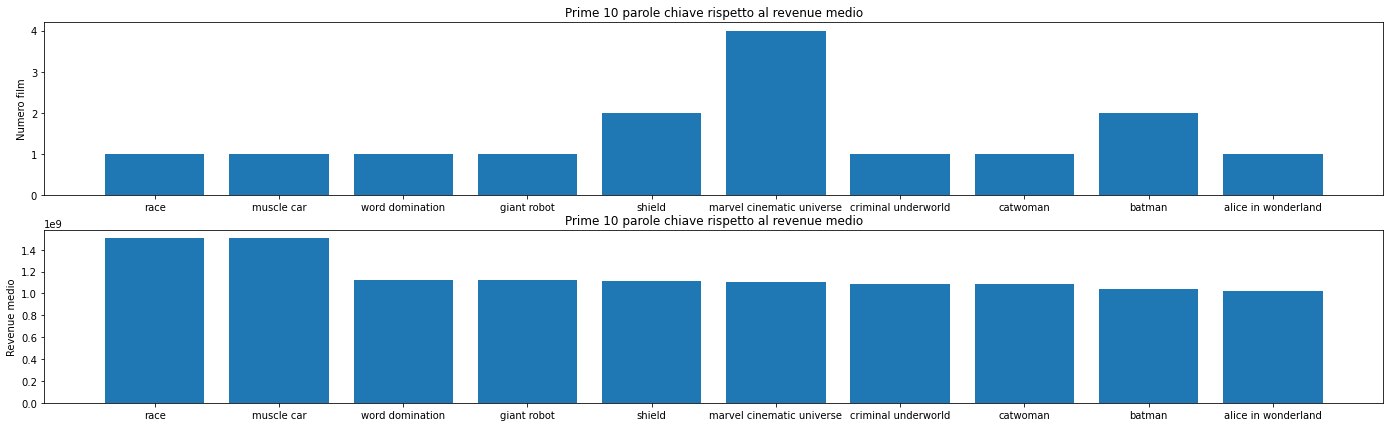

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(keywords[best_keywords_rev[:10]],numFilm_per_keyword[best_keywords_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole chiave rispetto al revenue medio")

axs[1].bar(keywords[best_keywords_rev[:10]],mean_rev_per_keyword[best_keywords_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole chiave rispetto al revenue medio")

Anche qua c'è la stessa cosa che c'era per i paesi produttori. Tutte queste prole chiave compaiono in pochissimi film con guadagno molto alto. Dunque tale analisi non è significativa. Non vale la pena prendere in considerazione questa alternativa 2.

### 4) CAST

Effettuiamo pulizia come visto precedentemente. Anche qua ci sono (pochi) missing values.

In [2]:
(df["cast"].isna()).sum()

13

In [3]:
df["cast"][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

In [4]:
# Togliamo i valori nulli
df["cast"] = df["cast"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["cast"]=df["cast"].map(lambda obj : eval(obj))
# Ogni lista di dizionari lo rendiamo un insieme di attori
df["cast"] = df["cast"].map(lambda lst : {dct['name'] for dct in lst})

In [5]:
df["cast"][0]

{'Adam Herschman',
 'Adam Scott',
 'Bianca Haase',
 'Bruce Buffer',
 'Chevy Chase',
 'Christian Slater',
 'Christine Bently',
 'Clark Duke',
 'Collette Wolfe',
 'Craig Robinson',
 'Gillian Jacobs',
 'Gretchen Koerner',
 'Jason Jones',
 'Jessica Williams',
 'John Cusack',
 'Josh Heald',
 'Kellee Stewart',
 'Kisha Sierra',
 'Kumail Nanjiani',
 'Lisa Loeb',
 'Mariana Paola Vicente',
 'Olivia Jordan',
 'Rob Corddry',
 'Stacey Asaro'}

Prendiamo tutti gli attori

In [6]:
actors = set([])
for film in list(df.index.values):
    actors |= df.loc[film,"cast"]
actors = np.array(list(actors))

print(len(actors))
actors[:6]

38588


array(['Gerald King', 'Buddy Hackett', 'Kristin Lehman',
       'Robert D. Parham', 'Brendan Titley', 'Hana Pindurov√°'],
      dtype='<U36')

Text(0.5, 1.0, 'Revenue medio per attore - primi 10')

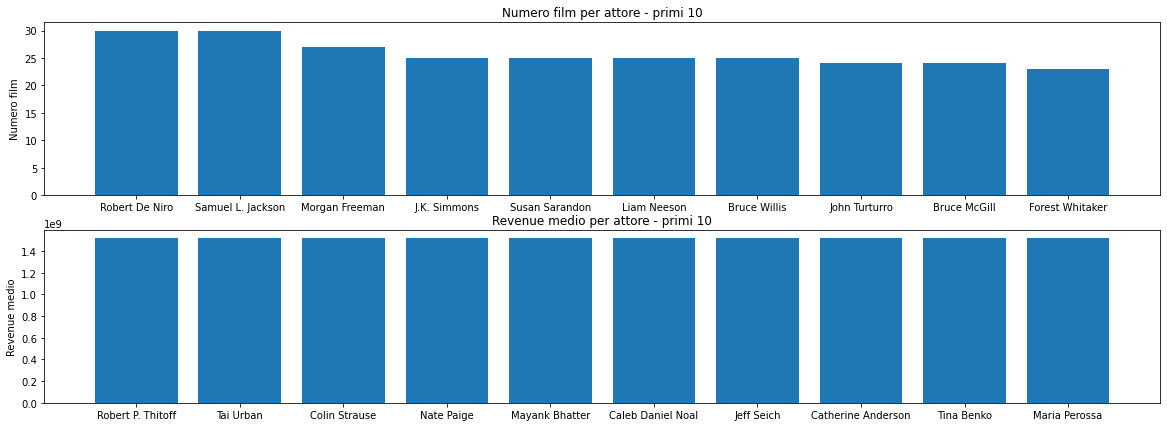

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_actor = np.array([ (df[[ c in s for s in df["cast"] ]]).shape[0] for c in actors])
best_actors_num = np.argsort(numFilm_per_actor)[::-1]
axs[0].bar(actors[best_actors_num[:10]],numFilm_per_actor[best_actors_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per attore - primi 10")

mean_rev_per_actor = np.array([ (df["revenue"][ [ c in s for s in df["cast"] ] ]).mean() for c in actors])
best_actors_rev = np.argsort(mean_rev_per_actor)[::-1]
axs[1].bar(actors[best_actors_rev[:10]],mean_rev_per_actor[best_actors_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per attore - primi 10")

**ALTERNATIVA 1**

Tengo i primi *k* attori più numerosi: da queste k creo k variabili dummy, che segnalano se un film ha o meno quell'attore.

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Primi 10 attori rispetto al numero film')

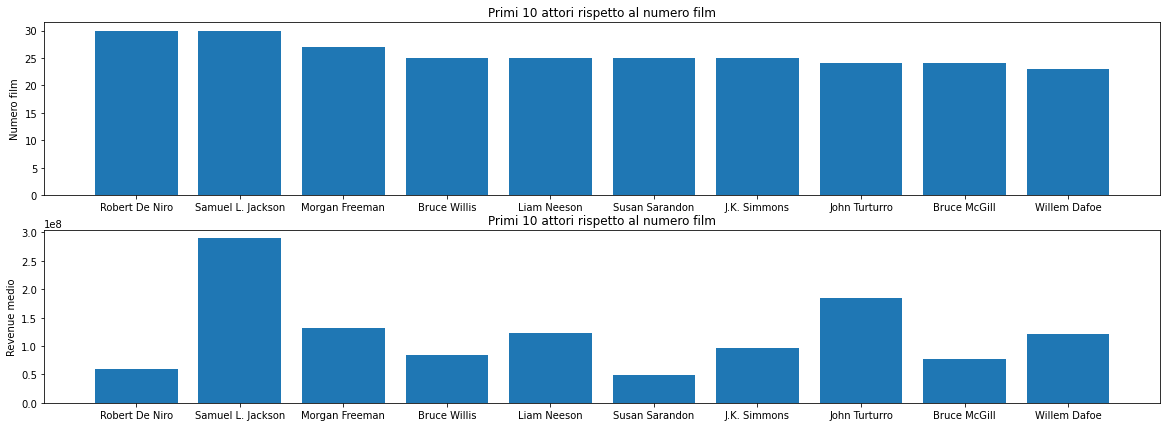

In [299]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(actors[best_actors_num[:10]],numFilm_per_actor[best_actors_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Primi 10 attori rispetto al numero film")

axs[1].bar(actors[best_actors_num[:10]],mean_rev_per_actor[best_actors_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Primi 10 attori rispetto al numero film")

Ovviamente ci sono più k possibili.

**ALTERNATIVA 2**

Stessa cosa, solo che ordino gli attori rispetto al revenue medio.
Tengo i primi *k* attori rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quell' attore. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 attori rispetto al revenue medio')

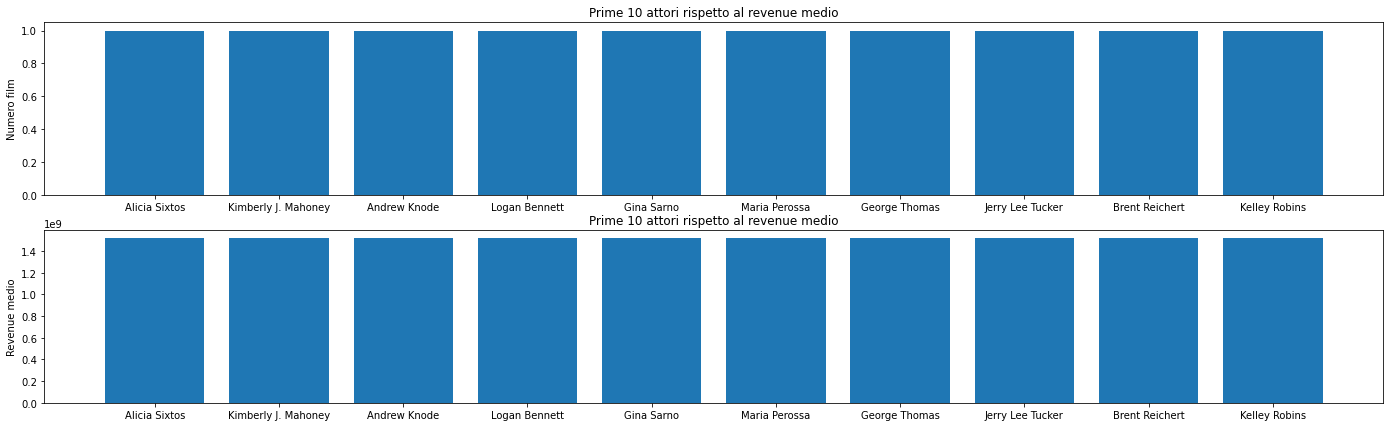

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(actors[best_actors_rev[:10]],numFilm_per_actor[best_actors_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 attori rispetto al revenue medio")

axs[1].bar(actors[best_actors_rev[:10]],mean_rev_per_actor[best_actors_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 attori rispetto al revenue medio")

Anche qua c'è la stessa cosa vista prima. Tutti questi attori compaiono in pochissimi film con guadagno molto alto (compaiono proprio in un solo film, che è lo stesso).

In [16]:
df["title"][[ len(set(actors[best_actors_rev[:10]])&s)>0 for s in df["cast"]]]

1126    The Avengers
Name: title, dtype: object

Dunque tale analisi non è significativa. Non vale la pena prendere in considerazione questa alternativa 2.

### 4) CREW

Effettuiamo pulizia come visto precedentemente. Anche qua ci sono (pochi) missing values.

In [8]:
(df["crew"].isna()).sum()

16

In [9]:
df["crew"][0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [10]:
# Togliamo i valori nulli
df["crew"] = df["crew"].fillna("{}")
# Ogni elemento lo rendiamo lista di dizionari
df["crew"]=df["crew"].map(lambda obj : eval(obj))
# Ogni lista di dizionari lo rendiamo un insieme di membri della crew.
df["crew"] = df["crew"].map(lambda lst : {dct['name'] for dct in lst})

In [11]:
df["crew"][0]

{'Adam Blum',
 'Allison Gordin',
 'Andrew Panay',
 'Annabelle MacNeal',
 'Ben Ormand',
 'Brad Garris',
 'Brendan Turrill',
 'Brook Yeaton',
 'Caleb Guillotte',
 'Carl G. Variste',
 'Carol Cutshall',
 'Catherine Rodi',
 'Chris Ekstrom',
 'Chris Roff',
 'Christophe Beck',
 'Chuck Picerni Jr.',
 'Daina Daigle',
 'Daniel Coe',
 'Darryl Lucas',
 'Declan Quinn',
 'Eric Roberts',
 'Eunha Choi',
 'Gabriel J. Serrano',
 'Gail Marks',
 'Gary C. Bourgeois',
 'Giselle Spence',
 'Jamie Gross',
 'Jason Baldwin Stewart',
 'Jason Salzman',
 'Joe Waistell',
 'John A. Johnston',
 'John Karnay',
 'Joseph Payo',
 'Josh Heald',
 'Josh King',
 'Kelly Cantley',
 'Kendell Joseph',
 'Korey Budd',
 'Marina Savva',
 'Mark Karavite',
 'Matt Fausak',
 'Matt Kutcher',
 'Matt Moore',
 'Matthew Armstrong',
 'Michael Applebaum',
 'Michael B. Koff',
 'Michael Hilkene',
 'Nicole Garcea',
 "Pat A. O'Connor",
 'Paul Olinde',
 'Randall Guth',
 'Remi Savva',
 'Rob Corddry',
 'Rocco Passionino',
 'Ryan Berg',
 'Sarah P. Koep

Prendiamo tutti i membri della crew

In [12]:
crew = set([])
for film in list(df.index.values):
    crew |= df.loc[film,"crew"]
crew = np.array(list(crew))

print(len(crew))
actors[:6]

38554


array(['Gerald King', 'Buddy Hackett', 'Kristin Lehman',
       'Robert D. Parham', 'Brendan Titley', 'Hana Pindurov√°'],
      dtype='<U36')

Text(0.5, 1.0, 'Revenue medio per membro della crew - primi 10')

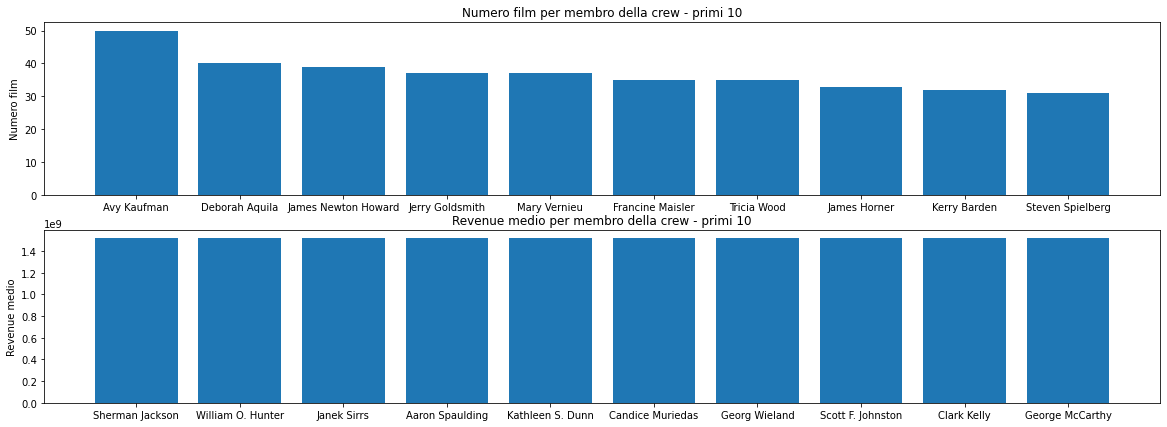

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_crew = np.array([ (df[[ c in s for s in df["crew"] ]]).shape[0] for c in crew])
best_crew_num = np.argsort(numFilm_per_crew)[::-1]
axs[0].bar(crew[best_crew_num[:10]],numFilm_per_crew[best_crew_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per membro della crew - primi 10")

mean_rev_per_crew = np.array([ (df["revenue"][ [ c in s for s in df["crew"] ] ]).mean() for c in crew])
best_crew_rev = np.argsort(mean_rev_per_crew)[::-1]
axs[1].bar(crew[best_crew_rev[:10]],mean_rev_per_crew[best_crew_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per membro della crew - primi 10")

**ALTERNATIVA 1**

Tengo i primi *k* membri della crew più numerosi: da queste k creo k variabili dummy, che segnalano se un film ha o meno quel membro della crew.

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Primi 10 membri della crew rispetto al numero film')

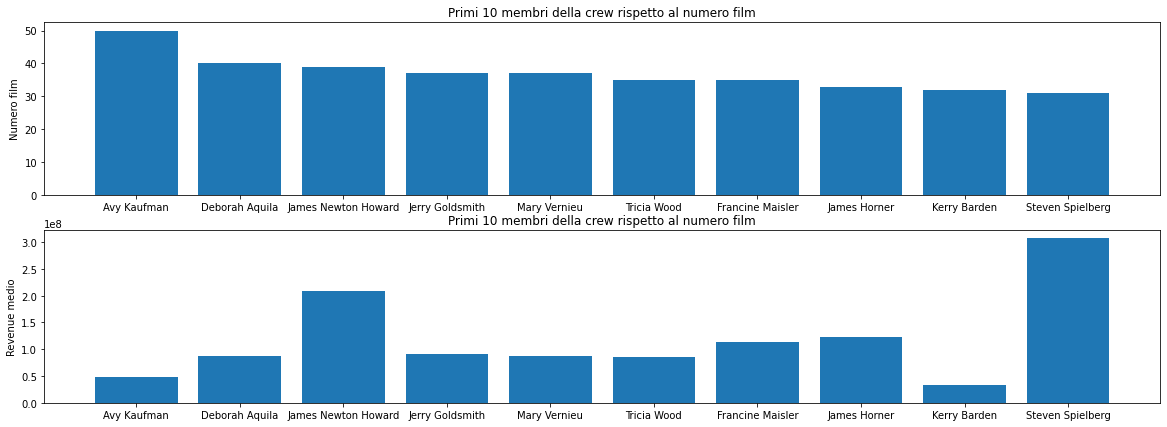

In [300]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(crew[best_crew_num[:10]],numFilm_per_crew[best_crew_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Primi 10 membri della crew rispetto al numero film")

axs[1].bar(crew[best_crew_num[:10]],mean_rev_per_crew[best_crew_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Primi 10 membri della crew rispetto al numero film")

Ovviamente ci sono più k possibili.

**ALTERNATIVA 2**

Stessa cosa, solo che ordino i membri della crew rispetto al revenue medio.
Tengo i primi *k* membri della crew rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quel membro della crew. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 membri della crew rispetto al revenue medio')

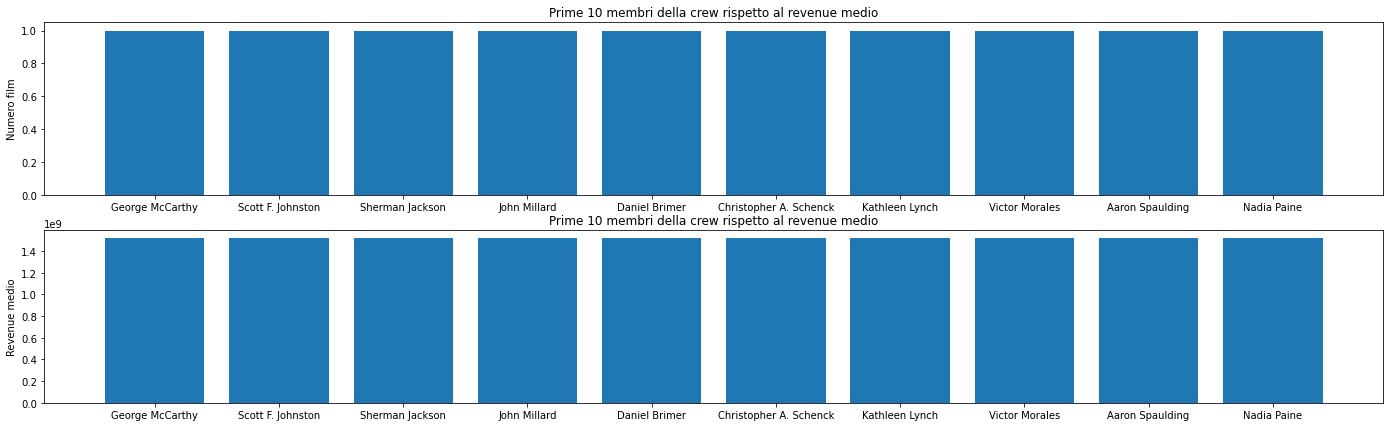

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(crew[best_crew_rev[:10]],numFilm_per_crew[best_crew_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Primi 10 membri della crew rispetto al revenue medio")

axs[1].bar(crew[best_crew_rev[:10]],mean_rev_per_crew[best_crew_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Primi 10 membri della crew rispetto al revenue medio")

Anche qua c'è la stessa cosa vista prima. Tutti questi membri della crew compaiono in pochissimi film con guadagno molto alto (compaiono proprio in un solo film, che è lo stesso).

In [16]:
df["title"][[ len(set(crew[best_crew_rev[:10]])&s)>0 for s in df["crew"]]]

1126    The Avengers
Name: title, dtype: object

Dunque tale analisi non è significativa. Non vale la pena prendere in considerazione questa alternativa 2.

## FEATURES TESTUALI

### 1) TITLE

Essendo "title" composto generalmente da poche parole, lo consideriamo come un insieme di parole (non consideriamo la molteplicità).

Vediamo due modi per suddividere "title" in parole: stemming e lemmatization.

**Stemming**

In [60]:
from textblob import TextBlob
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english')) # Definiamo anche le stopwords : parole da non considerare

In [397]:
set(TextBlob(df["title"][0]).lower().words.stem()) # Ecco come estrarre da un titolo gli stemmi.

{'2', 'hot', 'machin', 'time', 'tub'}

Trasformiamo dunque "title".

In [23]:
df["title"] = df["title"].map(lambda s : set(TextBlob(s).lower().words.stem()) - stopwords)

Prendiamo tutte le possibili parole.

In [24]:
words_title = set([])
for film in list(df.index.values):
    words_title |= df.loc[film,"title"]
words_title = np.array(list(words_title))

In [25]:
print(len(words_title))
words_title

3086


array(['crook', 'around', 'fright', ..., 'chennai', 'produc', 'a-team'],
      dtype='<U22')

Text(0.5, 1.0, 'Revenue medio per parola nel titolo - prime 10')

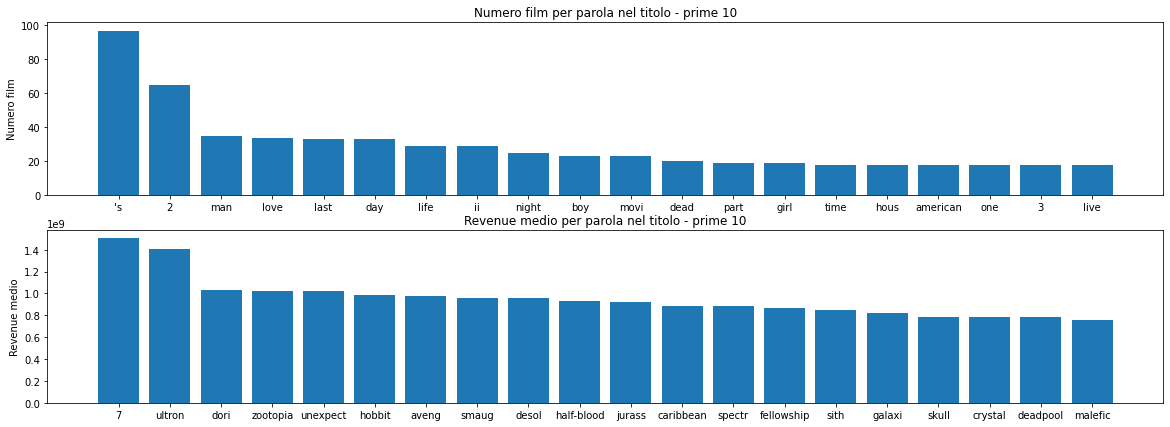

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_wordTitle = np.array([ (df[[ c in s for s in df["title"] ]]).shape[0] for c in words_title])
best_wordTitle_num = np.argsort(numFilm_per_wordTitle)[::-1]
axs[0].bar(words_title[best_wordTitle_num[:20]],numFilm_per_wordTitle[best_wordTitle_num[:20]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per parola nel titolo - prime 10")

mean_rev_per_wordTitle = np.array([ (df["revenue"][ [ c in s for s in df["title"] ] ]).mean() for c in words_title])
best_wordTitle_rev = np.argsort(mean_rev_per_wordTitle)[::-1]
axs[1].bar(words_title[best_wordTitle_rev[:20]],mean_rev_per_wordTitle[best_wordTitle_rev[:20]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per parola nel titolo - prime 10")

Come si vede, alcune parole risultano storpiate : "movi", "spectre",  "galaxi", ... .

**Lemmatization**

Bisogna prima ricaricare "title".

In [57]:
data_url = "train.csv"
df1 = pd.read_csv(data_url)
df["title"] = df1["title"]

In [58]:
# Ritorna la lista di lemmi, ottenuti con gli opportuni POS tag
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence).lower()
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return lemmatized_list

In [61]:
set(lemmatize_with_postag(df["title"][0]))  # Ecco come estrarre da un titolo i lemmi.

{'2', 'hot', 'machine', 'time', 'tub'}

Trasformiamo dunque "title". 

In [29]:
df["title"] = df["title"].map(lambda s : set(lemmatize_with_postag(s)) - stopwords)

Prendiamo tutte le parole

In [30]:
words_title = set([])
for film in list(df.index.values):
    words_title |= df.loc[film,"title"]
words_title = np.array(list(words_title))

In [31]:
print(len(words_title))
words_title

3127


array(['crook', 'around', 'fright', ..., 'brigade', 'chennai', 'a-team'],
      dtype='<U23')

Text(0.5, 1.0, 'Revenue medio per parola nel titolo - prime 20')

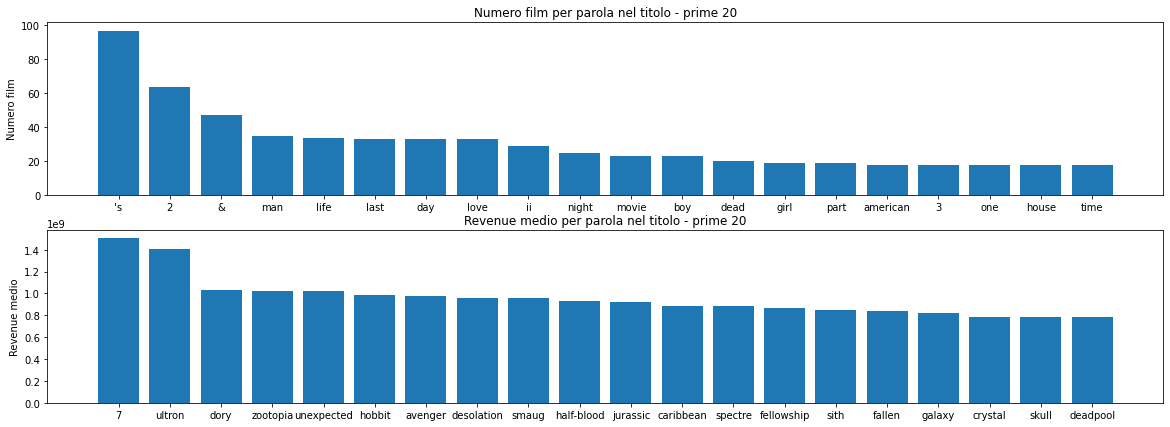

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_wordTitle = np.array([ (df[[ c in s for s in df["title"] ]]).shape[0] for c in words_title])
best_wordTitle_num = np.argsort(numFilm_per_wordTitle)[::-1]
axs[0].bar(words_title[best_wordTitle_num[:20]],numFilm_per_wordTitle[best_wordTitle_num[:20]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per parola nel titolo - prime 20")

mean_rev_per_wordTitle = np.array([ (df["revenue"][ [ c in s for s in df["title"] ] ]).mean() for c in words_title])
best_wordTitle_rev = np.argsort(mean_rev_per_wordTitle)[::-1]
axs[1].bar(words_title[best_wordTitle_rev[:20]],mean_rev_per_wordTitle[best_wordTitle_rev[:20]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per parola nel titolo - prime 20")

Le parole risultato più corrette: scelgo di applicare lemmatize piuttosto che stemming.

**ALTERNATIVA 1**

Tengo le prime *k* parole nel titolo più numerose: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola nel titolo.

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Primi 10 parole nel titolo rispetto al numero film')

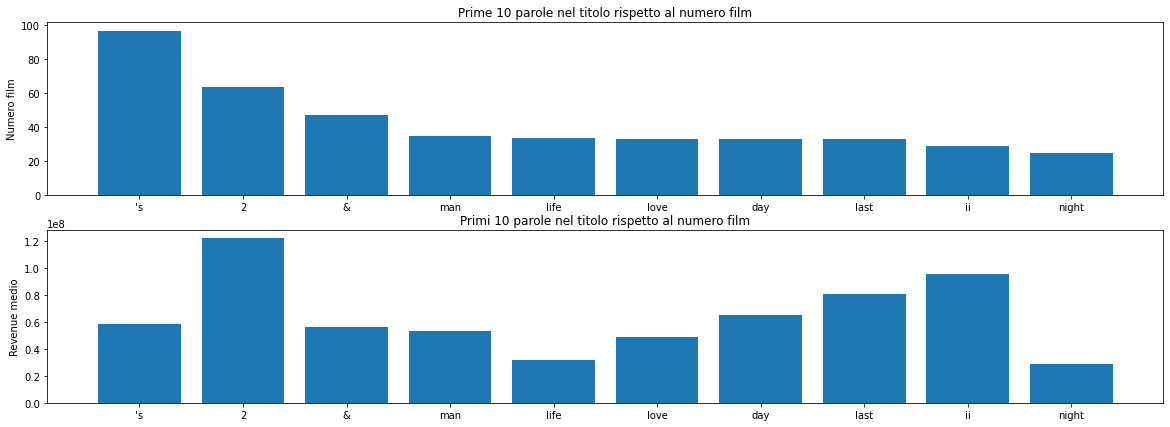

In [315]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(words_title[best_wordTitle_num[:10]],numFilm_per_wordTitle[best_wordTitle_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nel titolo rispetto al numero film")

axs[1].bar(words_title[best_wordTitle_num[:10]],mean_rev_per_wordTitle[best_wordTitle_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole nel titolo rispetto al numero film")

Ovviamente ci sono più k possibili. Inoltre le parole non significative le tolgo a mano (come " 's ").

**ALTERNATIVA 2**

Stessa cosa, solo che ordino le parole nel titolo rispetto al revenue medio.
Tengo le primie *k* parole nel titolo rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola nel titolo. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 parole nel titolo rispetto al revenue medio')

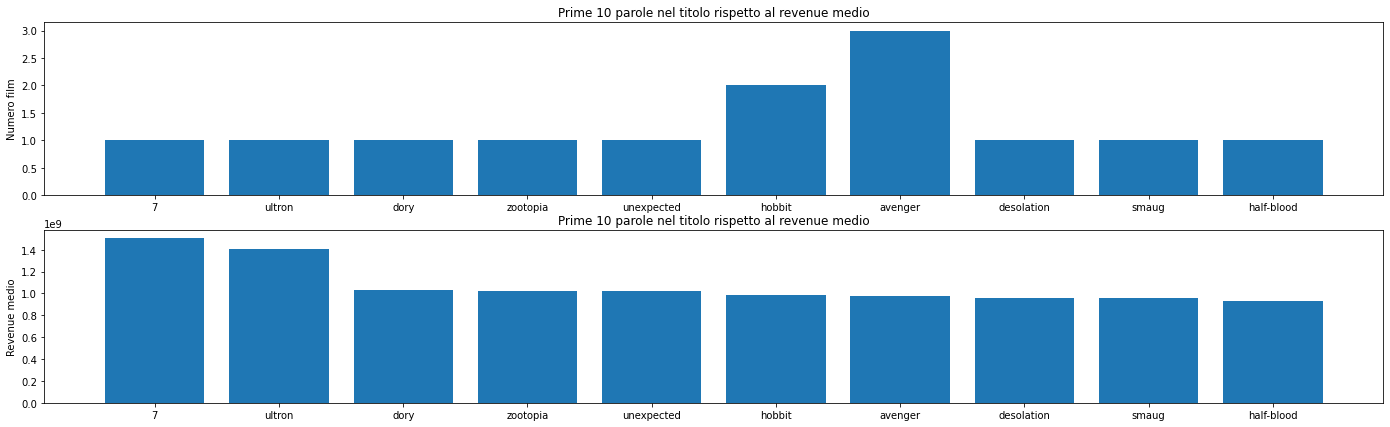

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(words_title[best_wordTitle_rev[:10]],numFilm_per_wordTitle[best_wordTitle_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nel titolo rispetto al revenue medio")

axs[1].bar(words_title[best_wordTitle_rev[:10]],mean_rev_per_wordTitle[best_wordTitle_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole nel titolo rispetto al revenue medio")

Anche qua c'è la stessa cosa vista prima. Tutte queste parole compaiono in pochissimi film con guadagno molto alto. Non vale la pena provare alternativa 2 : solo alternativa 1.

### 2) ORIGINAL_TITLE

La variabile "title" contiene il titolo del film in inglese, "original_title" contiene il titolo del film in lingua originale. Essendo la maggior parte dei film in lingua inglese, non consideriamo tale feature e consideriamo solo "title". Anche perchè lo scopo di analizzare il titolo è quello di trovare similarità nel significato, non nella sintassi: per questo scopo è meglio considerare tutti i titoli in inglese.

### 3)TAGLINE

Essendo anche "tagline" composto generalmente da poche parole, lo trattiamo come "title" :  lo consideriamo come un insieme di parole (non consideriamo la molteplicità).
Suddividiamo in parole usando lemmatization.

Ha missing values

In [316]:
(df["tagline"].isna()).sum()

597

Li rimpiazziamo con testo vuoto.

In [34]:
df["tagline"] = df["tagline"].fillna("")

Trasformiamo dunque "tagline". 

In [35]:
df["tagline"] = df["tagline"].map(lambda s : set(lemmatize_with_postag(s)) - stopwords)

In [36]:
words_tagline = set([])
for film in list(df.index.values):
    words_tagline |= df.loc[film,"tagline"]
words_tagline = np.array(list(words_tagline))

In [37]:
print(len(words_tagline))
words_tagline

2732


array(['dock', 'bestseller', 'around', ..., 'bolder', 'house',
       'character'], dtype='<U38')

Text(0.5, 1.0, 'Revenue medio per parola nel tagline - prime 20')

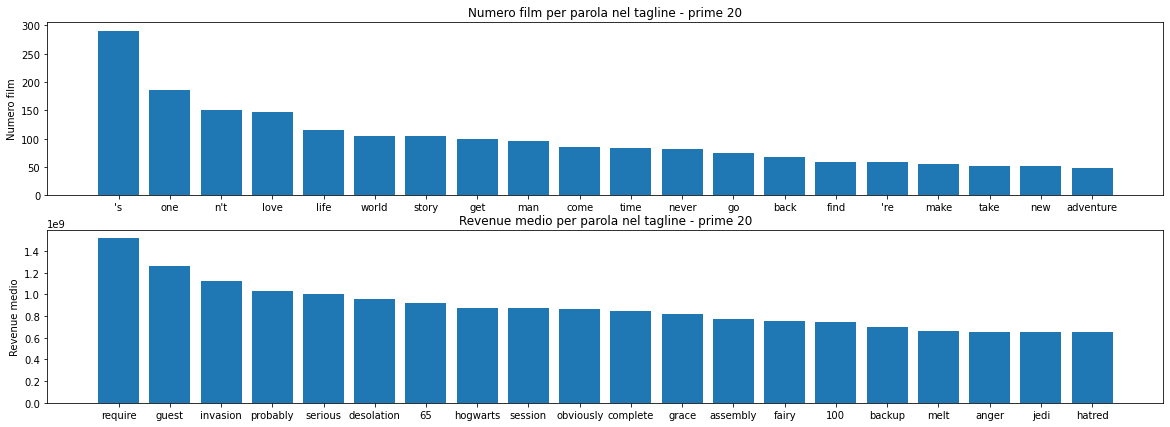

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_wordTagline = np.array([ (df[[ c in s for s in df["tagline"] ]]).shape[0] for c in words_tagline])
best_wordTagline_num = np.argsort(numFilm_per_wordTagline)[::-1]
axs[0].bar(words_tagline[best_wordTagline_num[:20]],numFilm_per_wordTagline[best_wordTagline_num[:20]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per parola nel tagline - prime 20")

mean_rev_per_wordTagline = np.array([ (df["revenue"][ [ c in s for s in df["tagline"] ] ]).mean() for c in words_tagline])
best_wordTagline_rev = np.argsort(mean_rev_per_wordTagline)[::-1]
axs[1].bar(words_tagline[best_wordTagline_rev[:20]],mean_rev_per_wordTagline[best_wordTagline_rev[:20]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per parola nel tagline - prime 20")

**ALTERNATIVA 1**

Tengo le prime *k* parole nel tagline più numerose: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola nel tagline.

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Primi 10 parole nel tagline rispetto al numero film')

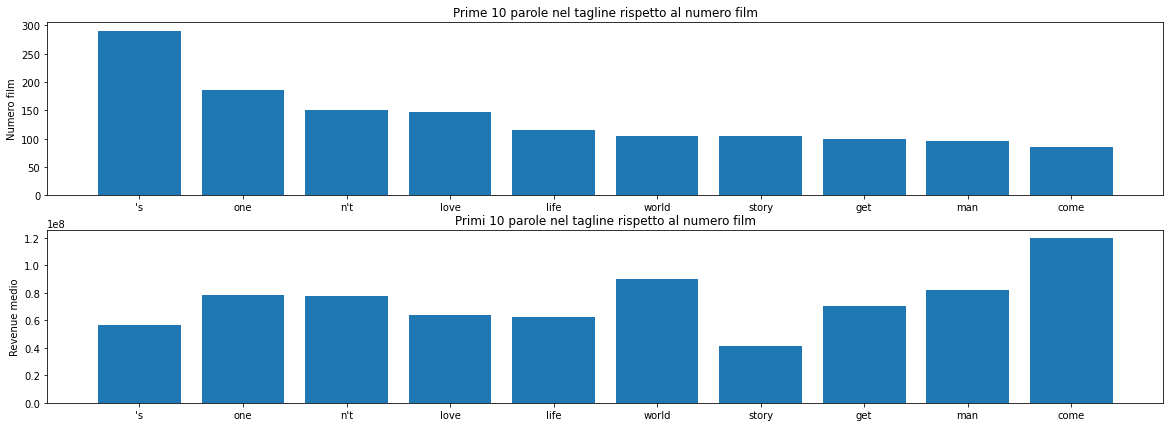

In [323]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(words_tagline[best_wordTagline_num[:10]],numFilm_per_wordTagline[best_wordTagline_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nel tagline rispetto al numero film")

axs[1].bar(words_tagline[best_wordTagline_num[:10]],mean_rev_per_wordTagline[best_wordTagline_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Primi 10 parole nel tagline rispetto al numero film")

Ovviamente ci sono più k possibili. Inoltre le parole non significative le tolgo a mano (come "'s" e "n't").
Da notare che molte parole sono simili a quelle trovate in "title".

**ALTERNATIVA 2**

Stessa cosa, solo che ordino nel parole nella tagline rispetto al revenue medio.
Tengo le primie *k* parole nel titolo rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parova nella tagline. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 parole nella taglineo rispetto al revenue medio')

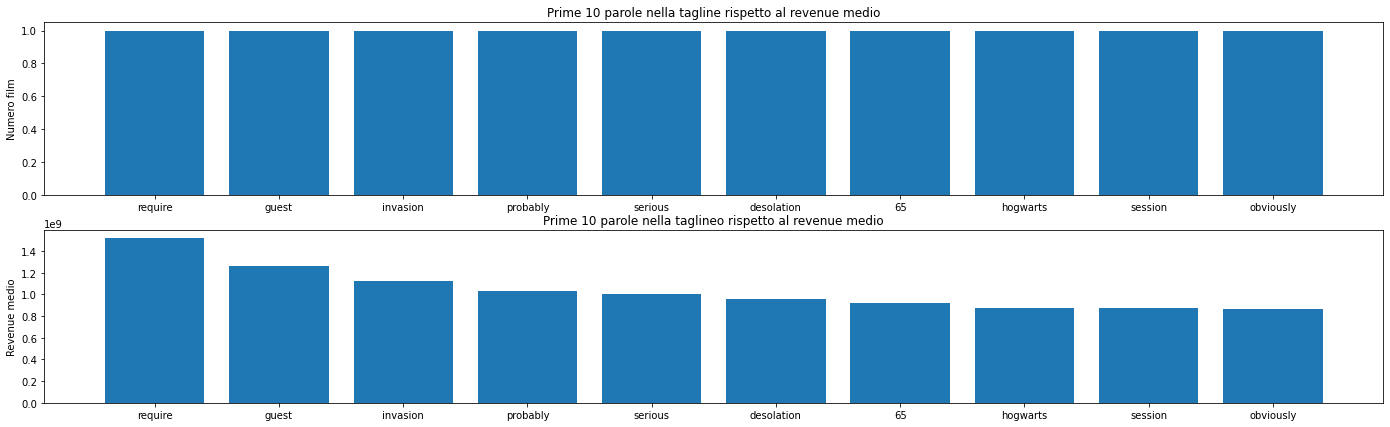

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(words_tagline[best_wordTagline_rev[:10]],numFilm_per_wordTagline[best_wordTagline_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nella tagline rispetto al revenue medio")

axs[1].bar(words_tagline[best_wordTagline_rev[:10]],mean_rev_per_wordTagline[best_wordTagline_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole nella taglineo rispetto al revenue medio")

Anche qua c'è la stessa cosa vista prima. Tutti queste parole compaiono in pochissimi film con guadagno molto alto. Non vale la pena provare alternativa 2 : solo alternativa 1.

### 4) OVERVIEW

L'overview è più complesso da trattare rispetto alle altre features testuali: infatti potrebbe non essere sufficiente considerare un overview come un insieme di parole. Potrebbe essere importante la molteplicità. Vedremo dunque varie alternative.

Iniziamo vedendo alternative che non tengono conto della molteplicità (approcio insiemistico). Lavoriamo "overview" come "title" e "tagline".

"overview" ha qualche missing values

In [22]:
(df["overview"].isna()).sum()

8

Li rimpiazziamo con testo vuoto.

In [23]:
df["overview"] = df["overview"].fillna("")

Trasformiamo dunque "overview". 

In [27]:
df["overview"] = df["overview"].map(lambda s : set(lemmatize_with_postag(s)) - stopwords)

Prendiamo tutte le parole

In [28]:
words_overview = set([])
for film in list(df.index.values):
    words_overview |= df.loc[film,"overview"]
words_overview = np.array(list(words_overview))

In [29]:
print(len(words_overview))
words_overview

15880


array(['sound', 'shane', 'wanda', ..., 'longtime', 'dystopian', 'sundara'],
      dtype='<U31')

Text(0.5, 1.0, "Revenue medio per parola nell'overview - prime 20")

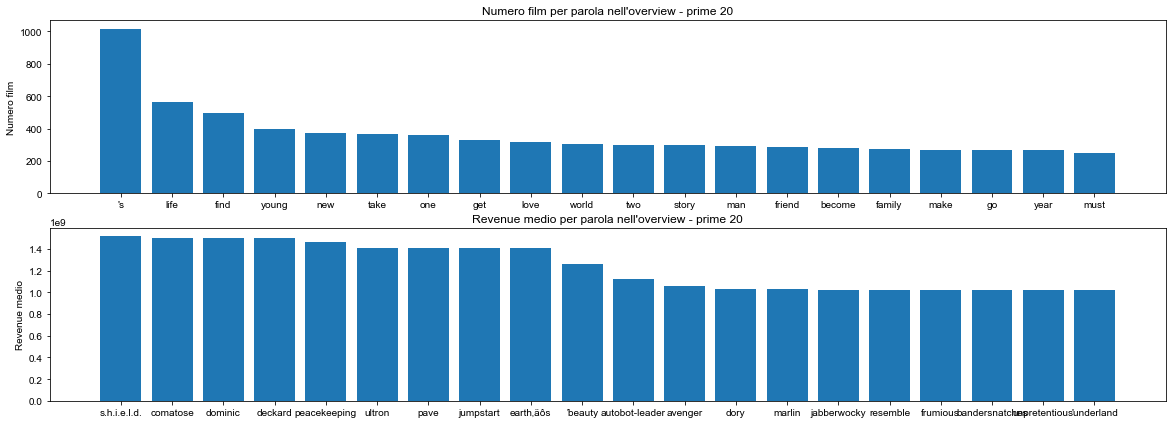

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

numFilm_per_wordOverview = np.array([ (df["revenue"][[ c in s for s in df["overview"] ]]).shape[0] for c in words_overview])
best_wordOverview_num = np.argsort(numFilm_per_wordOverview)[::-1]
axs[0].bar(words_overview[best_wordOverview_num[:20]],numFilm_per_wordOverview[best_wordOverview_num[:20]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Numero film per parola nell'overview - prime 20")

mean_rev_per_wordOverview = np.array([ (df["revenue"][ [ c in s for s in df["overview"] ] ]).mean() for c in words_overview])
best_wordOverview_rev = np.argsort(mean_rev_per_wordOverview)[::-1]
axs[1].bar(words_overview[best_wordOverview_rev[:20]],mean_rev_per_wordOverview[best_wordOverview_rev[:20]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Revenue medio per parola nell'overview - prime 20")

**ALTERNATIVA 1**

Tengo le prime *k* parole nell'overview più numerose: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parola nel'overview.

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, "Primi 10 parole nell'overview rispetto al numero film")

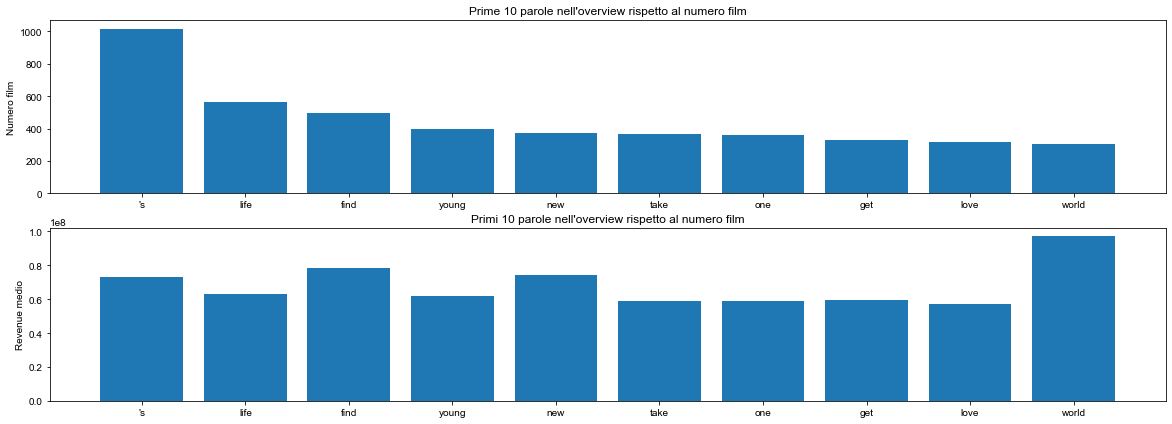

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(20,7)) 

axs[0].bar(words_overview[best_wordOverview_num[:10]],numFilm_per_wordOverview[best_wordOverview_num[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nell'overview rispetto al numero film")

axs[1].bar(words_overview[best_wordOverview_num[:10]],mean_rev_per_wordOverview[best_wordOverview_num[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Primi 10 parole nell'overview rispetto al numero film")

Ovviamente ci sono più k possibili. Inoltre le parole non significative le tolgo a mano (come "'s" ).
Da notare che molte parole sono simili a quelle trovate in "title" e "tagline".

**ALTERNATIVA 2**

Stessa cosa, solo che ordino nel parole nell'overview rispetto al revenue medio.
Tengo le primie *k* parole nell'overview rispetto al revenue medio: da queste k creo k variabili dummy, che segnalano se un film ha o meno quella parova nell'overview. 

Consideriamo ora come esempio $k=10$.

Text(0.5, 1.0, 'Prime 10 parole nella taglineo rispetto al revenue medio')

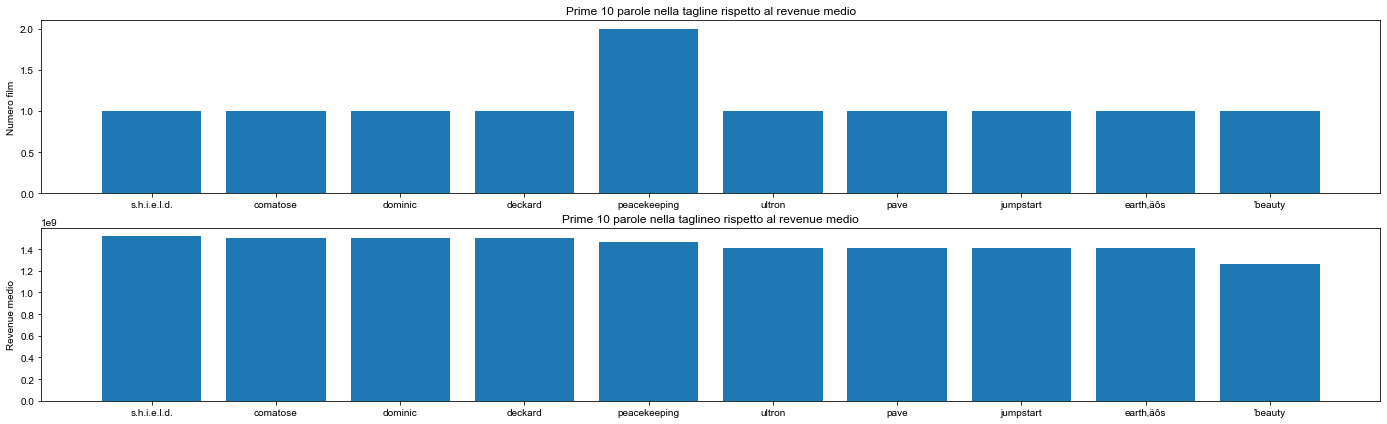

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2,ncols=1, figsize=(24,7)) 

axs[0].bar(words_overview[best_wordOverview_rev[:10]],numFilm_per_wordOverview[best_wordOverview_rev[:10]])
axs[0].set_ylabel("Numero film")
axs[0].set_title("Prime 10 parole nella tagline rispetto al revenue medio")

axs[1].bar(words_overview[best_wordOverview_rev[:10]],mean_rev_per_wordOverview[best_wordOverview_rev[:10]])
axs[1].set_ylabel("Revenue medio")
axs[1].set_title("Prime 10 parole nella taglineo rispetto al revenue medio")

Anche qua le parole compaiono in pochissimi film : non consideriamo questa alternativa.

**ALTERNATIVA 3**

Bisogna ricaricare il dataset.

In [62]:
data_url = "train.csv"
df1 = pd.read_csv(data_url)
df["overview"] = df1["overview"]

L'approcio insiemistico potrebbe non bastare. Consideriamo molteplicità delle parole.

In [5]:
df["overview"] = df["overview"].fillna("")
df["overview"] = df["overview"].map(lambda s : lemmatize_with_postag(s))

Costruiamo il vector_space di "overview" . Creo una matrice che ha tante righe quanti i film e tante colonne quante tutte le diverse parole possibili nei vari "overview" : nell'elemento i,j metto il numero di volte che la parola j compare nel film i. Inoltre scalo ciascuna di queste frequenze per l'inverse document frequency (idf). (I film che sono stati tolti perchè hanno revenue<=1000 hanno tutta la riga con soli 0).

Costruiamoci innanzitutto il lessico di "overview" (il lessico è l'insieme di tutte le parole).

In [7]:
lexicon = set([])
for film in df.index.values:
    lexicon |= set(df.loc[film,"overview"])
lexicon = lexicon - stopwords

lexicon_map     = {term:id for id,term in enumerate(lexicon)} # Mappa parole->id interi
lexicon_rev_map = {id:term for term,id in lexicon_map.items()} # Mappa id interi->parole

print(list(lexicon)[:6])
print(len(lexicon))

['closure', 'von', 'unpunished', 'ketchum', 'la', '19th']
15880


Costruiamo il vector space.

In [8]:
from lavorazione_dataset_InsText import get_vector_space # Funzione definita nel file python

vector_space = get_vector_space(df["overview"],lexicon_map)

print(vector_space.shape)

Ora quello che semplicemente faccio è selezionare le $k$ parole migliori e mettere le loro colonne del vector space nel dataset. Seleziono le $k$ parole migliori rispetto al loro numero complessivo in tutti gli overview (ovvero l'importanza di una parola è la somma di tutti i valori della sua colonna nel vector space).

Prendiamo come esempio k=15.

In [13]:
importance_per_word = [np.sum(vector_space[:,word]) for word in range(len(lexicon))]
sorted_words = np.argsort(importance_per_word)[::-1]
selected_words = [ lexicon_rev_map[id] for id in sorted_words[:15]] # k=15

selected_words

In [14]:
selected_words

["'s",
 'life',
 'find',
 'new',
 'one',
 'take',
 'love',
 'young',
 'get',
 'world',
 'man',
 'family',
 'story',
 'two',
 'friend']

Le parole migliori rispetto al vector space sono molto simili alle parole migliori trovate nell'alternativa 1. (Anche qua tolgo a mano " 's").

**ALTERNATIVA 4**

Come ultima alternativa usiamo la similarità tra film che riusciamo a costruire a partire dal vector space. E semplicemente creiamo la feature che è la media dei revenue dei $k$ film più simili.

La matrice delle similarità è molto costosa da costruire. L'ho costruita e salvata in un file csv. Per vedere come ho costruito tale file csv consultare "similarity_vector.py". 

La matrice di similarità contiene la similarità tra ogni coppia di film. Nella diagonale principale ci sono tutti -1. I film che hanno tutta la riga nel vector space formata da 0 hanno solo valori -1 nel similarity vector.

In [60]:
similarity_vector = pd.read_csv("similarity_vector.csv")
print(similarity_vector.head())

similarity_vector = similarity_vector.values

          0         1        2         3         4         5         6  \
0 -1.000000  0.009105  0.00000  0.000000  0.000000  0.014196  0.017018   
1  0.009105 -1.000000  0.00000  0.001624  0.000000  0.007656  0.009522   
2  0.000000  0.000000 -1.00000  0.054840  0.000000  0.000000  0.009876   
3  0.000000  0.001624  0.05484 -1.000000  0.002973  0.011391  0.020524   
4  0.000000  0.000000  0.00000  0.002973 -1.000000  0.000000  0.006568   

         7         8         9  ...      2990  2991      2992     2993  \
0  0.00000  0.009768  0.000000  ...  0.000000   0.0  0.000000  0.00000   
1  0.01307  0.005268  0.013788  ...  0.023735   0.0  0.031246  0.00737   
2  0.00000  0.007406  0.000000  ...  0.024486   0.0  0.000000  0.00000   
3  0.00000  0.014648  0.013923  ...  0.012573   0.0  0.000000  0.00000   
4  0.00000  0.052763  0.032213  ...  0.005388   0.0  0.000000  0.00000   

       2994      2995     2996      2997      2998      2999  
0  0.018546  0.010184  0.00000  0.000000  0.000

In [23]:
print("Film: ",df.loc[2858,"title"])
print("Film più simile: ",df.loc[np.argsort(similarity_vector[2858,:])[::-1][0],"title"])
print("Secondo film più simile: ",df.loc[np.argsort(similarity_vector[2858,:])[::-1][1],"title"])

Film:  Cars
Film più simile:  Cars 2
Secondo film più simile:  Cars 3


Vediamo per ciascun film il suo revenue e il revenue del film più simile.

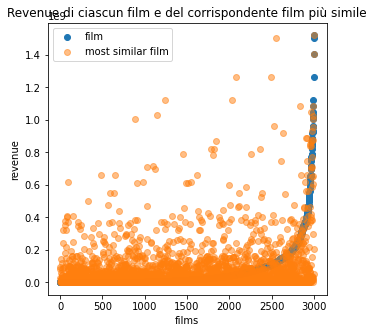

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(5,5))

ax.scatter(range(df.shape[0]),np.sort(df["revenue"]),label="film")
ax.scatter(range(df.shape[0]),[df.loc[np.argmax(similarity_vector[film,:]),"revenue"] for film in np.argsort(df["revenue"])],
                                   label="most similar film",alpha=0.5)
ax.set_xlabel("films")
ax.set_ylabel("revenue")
ax.set_title("Revenue di ciascun film e del corrispondente film più simile")
ax.legend()

Come si vede non si tratta di una misura proprio precisa...

Vediamo per ciascun film il suo revenue e il revenue medio dei 5 film più simili.

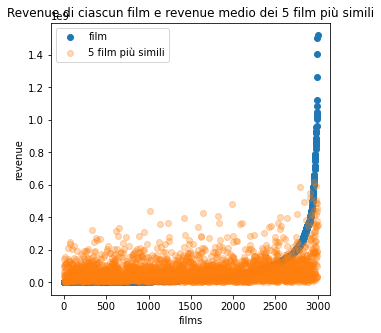

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize=(5,5))

ax.scatter(range(df.shape[0]),np.sort(df["revenue"]),label="film")
mean_rev_mstSimFilms = [df.loc[np.argsort(similarity_vector[film,:])[::-1][:5],"revenue"].mean() for film in np.argsort(df["revenue"])]
ax.scatter(range(df.shape[0]),mean_rev_mstSimFilms,label="5 film più simili",alpha=0.3)
ax.set_xlabel("films")
ax.set_ylabel("revenue")
ax.set_title("Revenue di ciascun film e revenue medio dei 5 film più simili")
ax.legend()

Nonostante non sembri una misura proprio precisa, la testiamo comunque questa alternativa.